In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - 206 data

### Reading the files and extracting relevant information:

In [3]:
plants = ["B"]
xls_files = {}

for plant in plants:
    xls = pd.ExcelFile(
        f"../../../data/raw/206/EMBRAPII hubIC IACC_CIMENTO_{plant}.xlsx",
        engine="openpyxl",
    )
    xls_files[plant] = xls

<IPython.core.display.Javascript object>

In [4]:
for plant, xls in xls_files.items():
    print("Palnt: ", plant, xls.sheet_names)

Palnt:  B ['127', '90', 'RX']


<IPython.core.display.Javascript object>

In [5]:
cement_types_per_plant = []
CEMENT_TYPE_COLS = ["Tipo de cimento", "Classe de resistência"]
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names:
        if sheet_name == "RX":
            continue
        df = pd.read_excel(xls_files[plant], sheet_name, header=[1, 2])

        if not df[CEMENT_TYPE_COLS].iloc[2:].isna().all().all():
            cement_type = (
                df[CEMENT_TYPE_COLS]
                .loc[3:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .str.replace("nan", "")
                .unique()
            )

        else:
            cement_type = (
                df[[("Obs.", "Unnamed: 8_level_1")]]
                .loc[3:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .unique()
            )

        cement_types_per_plant.append((plant, sheet_name, cement_type))
        dataframes.append(df)

<IPython.core.display.Javascript object>

In [6]:
cement_types_per_plant

[('B', '127', array(['CPIV32'], dtype=object)),
 ('B', '90', array(['CPVARI'], dtype=object))]

<IPython.core.display.Javascript object>

In [7]:
cements = []
for tup in cement_types_per_plant:
    cements.append(tup[2][0])
Counter(cements)

Counter({'CPIV32': 1, 'CPVARI': 1})

<IPython.core.display.Javascript object>

In [8]:
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names:
        if sheet_name == "RX":
            continue
        df = pd.read_excel(xls_files[plant], sheet_name, header=[0, 1, 2])
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"] = plant
        dataframes.append(df.drop([0, 1], axis=0).reset_index(drop=True).copy())

<IPython.core.display.Javascript object>

In [9]:
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [10]:
df["Dados iniciais"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   (Cidade, Unnamed: 1_level_2)                 0 non-null      float64
 1   (Data, Produção)                             1199 non-null   object 
 2   (Horário, Produção)                          2 non-null      object 
 3   (Data, Medida)                               2 non-null      object 
 4   (Horário, Medida)                            2 non-null      object 
 5   (Tipo de cimento, Unnamed: 6_level_2)        1200 non-null   object 
 6   (Classe de resistência, Unnamed: 7_level_2)  1200 non-null   object 
 7   (Obs., Unnamed: 8_level_2)                   599 non-null    object 
dtypes: float64(1), object(7)
memory usage: 75.1+ KB


<IPython.core.display.Javascript object>

In [11]:
# df["Materiais cimentícios suplementares"].infer_objects().info()

<IPython.core.display.Javascript object>

In [12]:
df["Cimento"]["Composição"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clínquer           4 non-null      object 
 1   Fíler calcário     4 non-null      object 
 2   Cinza volante      2 non-null      object 
 3   Escória            2 non-null      object 
 4   Argila calcinada   3 non-null      object 
 5   Sulfato de cálcio  4 non-null      object 
 6   Obs.               0 non-null      float64
dtypes: float64(1), object(6)
memory usage: 65.8+ KB


<IPython.core.display.Javascript object>

In [13]:
df["Cimento"]["Análise química"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaO                2 non-null      object 
 1   MgO                1196 non-null   object 
 2   Na2O               2 non-null      object 
 3   Al2O3              2 non-null      object 
 4   SiO2               2 non-null      object 
 5   SO3                1196 non-null   object 
 6   K2O                2 non-null      object 
 7   TiO2               2 non-null      object 
 8   Fe2O3              2 non-null      object 
 9   Perda ao fogo      1196 non-null   object 
 10  Resíduo insolúvel  1196 non-null   object 
 11  Obs.               0 non-null      float64
dtypes: float64(1), object(11)
memory usage: 112.6+ KB


<IPython.core.display.Javascript object>

In [14]:
df["Cimento"]["Análise mineralógica"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C3S total          2 non-null      object 
 1   C2S total          2 non-null      object 
 2   C2S alpha          2 non-null      object 
 3   C2S beta           2 non-null      object 
 4   C2S gama           2 non-null      object 
 5   C4AF               2 non-null      object 
 6   C3A                2 non-null      object 
 7   C3A cubic          2 non-null      object 
 8   C3A orto           2 non-null      object 
 9   CaO livre          2 non-null      object 
 10  Portlandita        2 non-null      object 
 11  Periclasio         2 non-null      object 
 12  Arcanita           2 non-null      object 
 13  Aphthalita         2 non-null      object 
 14  Langbeinita        2 non-null      object 
 15  Sulfato de cálcio  2 non-null      object 
 16  Bassanita          2 non

<IPython.core.display.Javascript object>

In [15]:
df["Cimento"].columns

MultiIndex([(          'Composição',          'Clínquer'),
            (          'Composição',    'Fíler calcário'),
            (          'Composição',     'Cinza volante'),
            (          'Composição',           'Escória'),
            (          'Composição',  'Argila calcinada'),
            (          'Composição', 'Sulfato de cálcio'),
            (          'Composição',              'Obs.'),
            (     'Análise química',               'CaO'),
            (     'Análise química',               'MgO'),
            (     'Análise química',              'Na2O'),
            (     'Análise química',             'Al2O3'),
            (     'Análise química',              'SiO2'),
            (     'Análise química',               'SO3'),
            (     'Análise química',               'K2O'),
            (     'Análise química',              'TiO2'),
            (     'Análise química',             'Fe2O3'),
            (     'Análise química',     'Perda ao fogo'

<IPython.core.display.Javascript object>

In [16]:
df["Característias físicas do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   (Unnamed: 78_level_1, Blaine)            1199 non-null   object 
 1   (Unnamed: 79_level_1, #200)              1199 non-null   object 
 2   (Unnamed: 80_level_1, #325)              1195 non-null   object 
 3   (Unnamed: 81_level_1, #400)              2 non-null      object 
 4   (Unnamed: 82_level_1, Massa específica)  4 non-null      object 
 5   (Unnamed: 83_level_1, Obs.)              0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 56.4+ KB


<IPython.core.display.Javascript object>

In [17]:
df["Propriedades do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Tempo de pega, Inicio)           1199 non-null   object 
 1   (Tempo de pega, Fim)              1199 non-null   object 
 2   (Resistência à compressão, 1 d)   1199 non-null   object 
 3   (Resistência à compressão, 3 d)   1198 non-null   object 
 4   (Resistência à compressão, 7 d)   1194 non-null   object 
 5   (Resistência à compressão, 28 d)  1171 non-null   object 
 6   (Obs., Unnamed: 90_level_2)       0 non-null      float64
dtypes: float64(1), object(6)
memory usage: 65.8+ KB


<IPython.core.display.Javascript object>

In [18]:
def convert_to_float(value):
    try:
        # If it's a string enclosed in single quotes, remove quotes and replace comma with dot
        if isinstance(value, str):
            return float(value.replace(",", "."))
        else:
            return float(value)
    except ValueError as e:
        print(e)
        return float("nan")

<IPython.core.display.Javascript object>

In [19]:
df = pd.concat(
    [
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"],
        df["Dados iniciais"],
        df["Cimento"]["Análise química"],
        df["Característias físicas do cimento"],
        df["Propriedades do cimento"],
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [20]:
COLUMNS_TO_DROP = [
    ("Data", "Medida"),
    ("Horário", "Produção"),
    ("Horário", "Medida"),
    ("Cidade", "Unnamed: 1_level_2"),
    ("Tipo de cimento", "Unnamed: 6_level_2"),
    ("Classe de resistência", "Unnamed: 7_level_2"),
    ("Unnamed: 83_level_1", "Obs."),
    ("Obs.", "Unnamed: 8_level_2"),
    ("Obs.", "Unnamed: 90_level_2"),
    "Obs.",
]

COLUMNS_TO_RENAME = {
    ("Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"): "Plant",
    ("Cidade", "Unnamed: 1_level_2"): "City",
    ("Data", "Produção"): "Date",
    ("Unnamed: 78_level_1", "Blaine"): "Blaine",
    ("Unnamed: 79_level_1", "#200"): "#200",
    ("Unnamed: 80_level_1", "#325"): "#325",
    ("Unnamed: 81_level_1", "#400"): "#400",
    ("Unnamed: 82_level_1", "Massa específica"): "Specific Gravity",
    ("Tempo de pega", "Inicio"): "Initial setting time",
    ("Tempo de pega", "Fim"): "Final setting time",
    ("Resistência à compressão", "1 d"): "CS1",
    ("Resistência à compressão", "3 d"): "CS3",
    ("Resistência à compressão", "7 d"): "CS7",
    ("Resistência à compressão", "28 d"): "CS28",
    "Perda ao fogo": "Loss on Ignition",
    "Resíduo insolúvel": "Insoluble Residue",
}

# Single variable for the Cement Type
df["Cement_Type"] = (
    df[
        [
            ("Tipo de cimento", "Unnamed: 6_level_2"),
            ("Classe de resistência", "Unnamed: 7_level_2"),
            ("Obs.", "Unnamed: 8_level_2"),
        ]
    ]
    .fillna("")
    .astype(str)
    .sum(axis=1)
)

df = df[(df["Cement_Type"] != "ManualManual")]

df = df.drop(COLUMNS_TO_DROP, axis=1).rename(COLUMNS_TO_RENAME, axis=1).copy()
# df = df.drop([0]).reset_index(drop=True)
df = df.infer_objects()

<IPython.core.display.Javascript object>

In [21]:
def preprocess_numeric_cols(df, columns):
    for col in columns:
        df[col] = df[col].astype(str)  # Ensure string type for string operations
        df[col] = df[col].str.replace("#", "")  # Remove '#' characters
        df[col] = df[col].str.replace(",", ".")  # Replace ',' with '.' for decimals
    return df

<IPython.core.display.Javascript object>

In [22]:
NUMERIC_COLUMNS = [
    "CaO",
    "MgO",
    "Na2O",
    "Al2O3",
    "SiO2",
    "SO3",
    "K2O",
    "TiO2",
    "Fe2O3",
    "Loss on Ignition",
    "Insoluble Residue",
    "Blaine",
    "#200",
    "#325",
    "#400",
    "Specific Gravity",
    "Final setting time",
    "Initial setting time",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
]

df = preprocess_numeric_cols(df, NUMERIC_COLUMNS)

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

df = df.reset_index(drop=True)
# Drop rows completely missing
index_to_keep = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
)
df = df.iloc[index_to_keep].reset_index(drop=True)

df = df.infer_objects()

<IPython.core.display.Javascript object>

# EDA

In [23]:
df.shape

(1197, 25)

<IPython.core.display.Javascript object>

In [24]:
df.head()

Plant       Date  CaO   MgO  Na2O  Al2O3  SiO2   SO3  K2O  TiO2  ...  #325  \
0     B 2020-01-02  NaN  4.11   NaN    NaN   NaN  3.80  NaN   NaN  ...  17.8   
1     B 2020-01-07  NaN  4.95   NaN    NaN   NaN  3.84  NaN   NaN  ...  20.5   
2     B 2020-01-09  NaN  4.38   NaN    NaN   NaN  3.69  NaN   NaN  ...  19.4   
3     B 2020-01-11  NaN  4.39   NaN    NaN   NaN  3.71  NaN   NaN  ...  20.2   
4     B 2020-01-14  NaN  4.36   NaN    NaN   NaN  3.73  NaN   NaN  ...  18.6   

   #400  Specific Gravity  Initial setting time  Final setting time      CS1  \
0   NaN              2.99                 130.0               205.0  12.4950   
1   NaN               NaN                 130.0               205.0  12.4075   
2   NaN               NaN                 130.0               210.0  11.9500   
3   NaN               NaN                 140.0               220.0  12.4450   
4   NaN               NaN                 135.0               215.0  12.5500   

       CS3      CS7     CS28  Cement_Type  
0  25.1425  34.5550  39.2875     CPIV32RS  
1  23.2500  35.9850  41.8425     CPIV32RS  
2  24.4150  36.8925  42.0100     CPIV32RS  
3  25.2800  36.7800  43.2650     CPIV32RS  
4  25.4925  36.6575  42.1425     CPIV32RS  

[5 rows x 25 columns]

<IPython.core.display.Javascript object>

In [25]:
df.tail()

Plant       Date  CaO   MgO  Na2O  Al2O3  SiO2   SO3  K2O  TiO2  ...  \
1192     B 2022-08-09  NaN  4.66   NaN    NaN   NaN  4.35  NaN   NaN  ...   
1193     B 2022-08-10  NaN  4.81   NaN    NaN   NaN  4.53  NaN   NaN  ...   
1194     B 2022-08-11  NaN  4.72   NaN    NaN   NaN  2.65  NaN   NaN  ...   
1195     B 2022-08-14  NaN  4.62   NaN    NaN   NaN  4.21  NaN   NaN  ...   
1196     B 2022-08-15  NaN  4.68   NaN    NaN   NaN  4.13  NaN   NaN  ...   

      #325  #400  Specific Gravity  Initial setting time  Final setting time  \
1192   1.9   NaN               NaN                 130.0               190.0   
1193   1.8   NaN               NaN                 135.0               190.0   
1194   1.9   NaN               NaN                 125.0               190.0   
1195   2.0   NaN               NaN                 130.0               205.0   
1196   1.9   NaN               NaN                 120.0               185.0   

          CS1      CS3      CS7     CS28  Cement_Type  
1192  23.2675  32.3425  39.5525  46.1100       CPVARI  
1193  21.2275  31.6900  37.2850  45.5225       CPVARI  
1194  22.9950  33.4050  40.0425  46.3175       CPVARI  
1195  20.7175  33.1200  37.9875  43.6000       CPVARI  
1196  21.9200  35.2625  42.4275  48.4825       CPVARI  

[5 rows x 25 columns]

<IPython.core.display.Javascript object>

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Plant                 1197 non-null   object        
 1   Date                  1197 non-null   datetime64[ns]
 2   CaO                   0 non-null      float64       
 3   MgO                   1194 non-null   float64       
 4   Na2O                  0 non-null      float64       
 5   Al2O3                 0 non-null      float64       
 6   SiO2                  0 non-null      float64       
 7   SO3                   1194 non-null   float64       
 8   K2O                   0 non-null      float64       
 9   TiO2                  0 non-null      float64       
 10  Fe2O3                 0 non-null      float64       
 11  Loss on Ignition      1194 non-null   float64       
 12  Insoluble Residue     1194 non-null   float64       
 13  Blaine            

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [27]:
df.dtypes.value_counts()

float64           22
object             2
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [28]:
df.describe().transpose()

count                           mean  \
Date                    1197  2021-07-03 06:46:36.992481280   
CaO                      0.0                            NaN   
MgO                   1194.0                       4.613155   
Na2O                     0.0                            NaN   
Al2O3                    0.0                            NaN   
SiO2                     0.0                            NaN   
SO3                   1194.0                       3.928935   
K2O                      0.0                            NaN   
TiO2                     0.0                            NaN   
Fe2O3                    0.0                            NaN   
Loss on Ignition      1194.0                       2.942913   
Insoluble Residue     1194.0                      15.445149   
Blaine                1197.0                    5405.022556   
#200                  1197.0                       2.825869   
#325                  1193.0                       10.85292   
#400                     0.0                            NaN   
Specific Gravity         2.0                          3.005   
Initial setting time  1197.0                     136.540518   
Final setting time    1197.0                     210.331662   
CS1                   1197.0                      19.864035   
CS3                   1196.0                      31.630123   
CS7                   1192.0                      38.734977   
CS28                  1169.0                      45.032001   

                                      min                  25%  \
Date                  2020-01-02 00:00:00  2020-10-08 00:00:00   
CaO                                   NaN                  NaN   
MgO                                   3.9                 4.25   
Na2O                                  NaN                  NaN   
Al2O3                                 NaN                  NaN   
SiO2                                  NaN                  NaN   
SO3                                  2.65                 3.76   
K2O                                   NaN                  NaN   
TiO2                                  NaN                  NaN   
Fe2O3                                 NaN                  NaN   
Loss on Ignition                     0.79                 1.91   
Insoluble Residue                    0.46                4.165   
Blaine                             3727.0               4520.0   
#200                                 0.03                 0.18   
#325                                 0.07                  1.9   
#400                                  NaN                  NaN   
Specific Gravity                     2.99               2.9975   
Initial setting time                 50.0                130.0   
Final setting time                  120.0                200.0   
CS1                                6.1825               12.905   
CS3                               18.3475            27.624375   
CS7                               26.6025            36.650625   
CS28                                32.34                42.93   

                                      50%                  75%  \
Date                  2021-06-28 00:00:00  2022-03-19 00:00:00   
CaO                                   NaN                  NaN   
MgO                                  4.58               4.8375   
Na2O                                  NaN                  NaN   
Al2O3                                 NaN                  NaN   
SiO2                                  NaN                  NaN   
SO3                                  3.91                 4.08   
K2O                                   NaN                  NaN   
TiO2                                  NaN                  NaN   
Fe2O3                                 NaN                  NaN   
Loss on Ignition                     2.78                 3.89   
Insoluble Residue                    9.44              26.7075   
Blaine                             5377.0               6201.0   
#

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [29]:
df.describe(exclude="number").T

count unique       top  freq                           mean  \
Plant        1197      1         B  1197                            NaN   
Date         1197    NaN       NaN   NaN  2021-07-03 06:46:36.992481280   
Cement_Type  1197      2  CPIV32RS   599                            NaN   

                             min                  25%                  50%  \
Plant                        NaN                  NaN                  NaN   
Date         2020-01-02 00:00:00  2020-10-08 00:00:00  2021-06-28 00:00:00   
Cement_Type                  NaN                  NaN                  NaN   

                             75%                  max  
Plant                        NaN                  NaN  
Date         2022-03-19 00:00:00  2023-03-26 00:00:00  
Cement_Type                  NaN                  NaN

<IPython.core.display.Javascript object>

In [30]:
df["Plant"].unique()

array(['B'], dtype=object)

<IPython.core.display.Javascript object>

In [31]:
df["Cement_Type"].unique()

array(['CPIV32RS', 'CPVARI'], dtype=object)

<IPython.core.display.Javascript object>

In [32]:
df["Plant"].value_counts()

Plant
B    1197
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [33]:
df["Cement_Type"].value_counts()

Cement_Type
CPIV32RS    599
CPVARI      598
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_1282927/3223151730.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


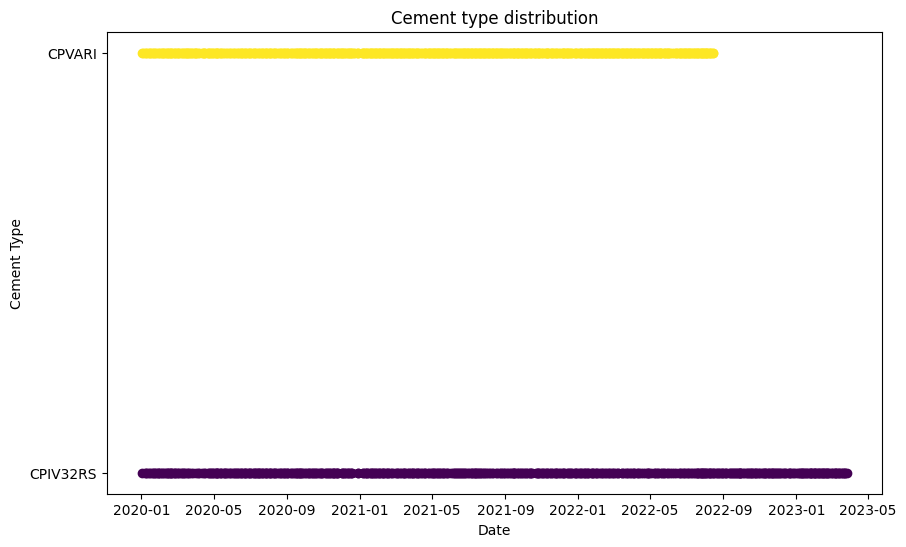

<IPython.core.display.Javascript object>

In [34]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(10, 6))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [35]:
dates = df["Date"].copy()

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

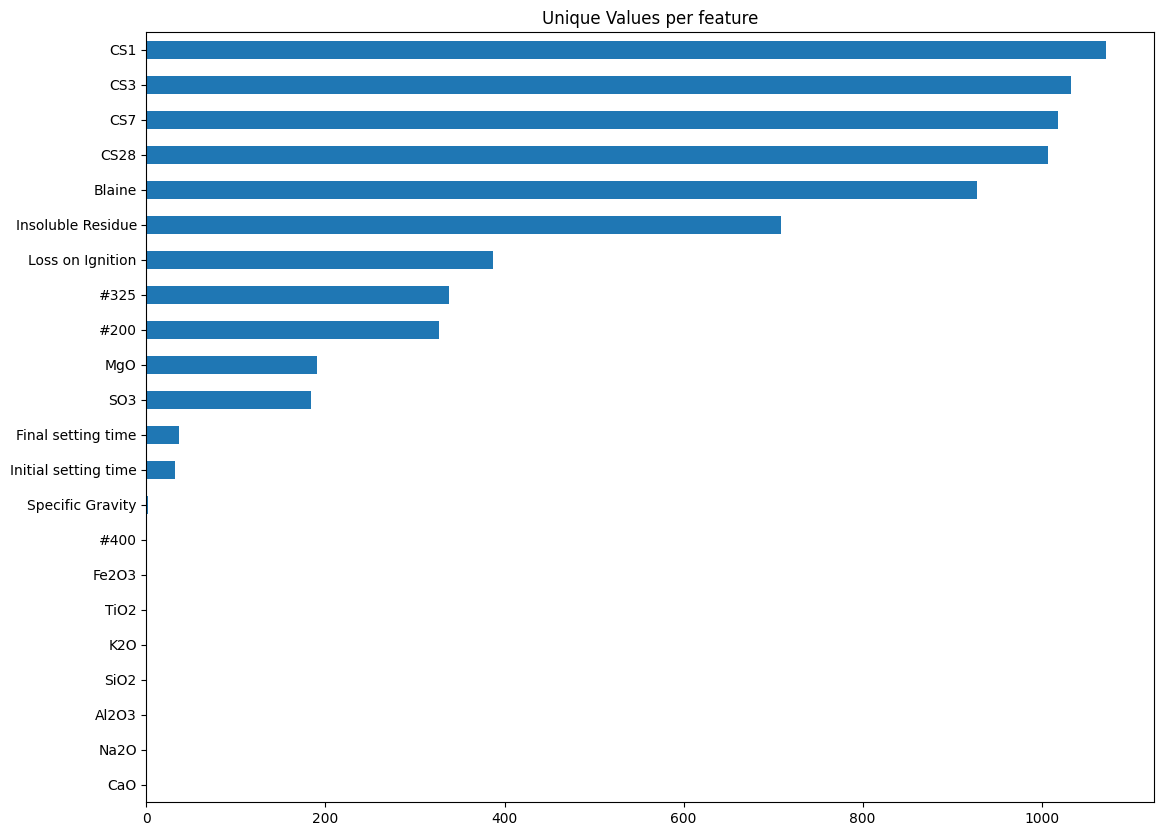

<IPython.core.display.Javascript object>

In [36]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2]),
 [Text(0, 0, 'Plant'), Text(1, 0, 'Cement_Type'), Text(2, 0, 'Date')])

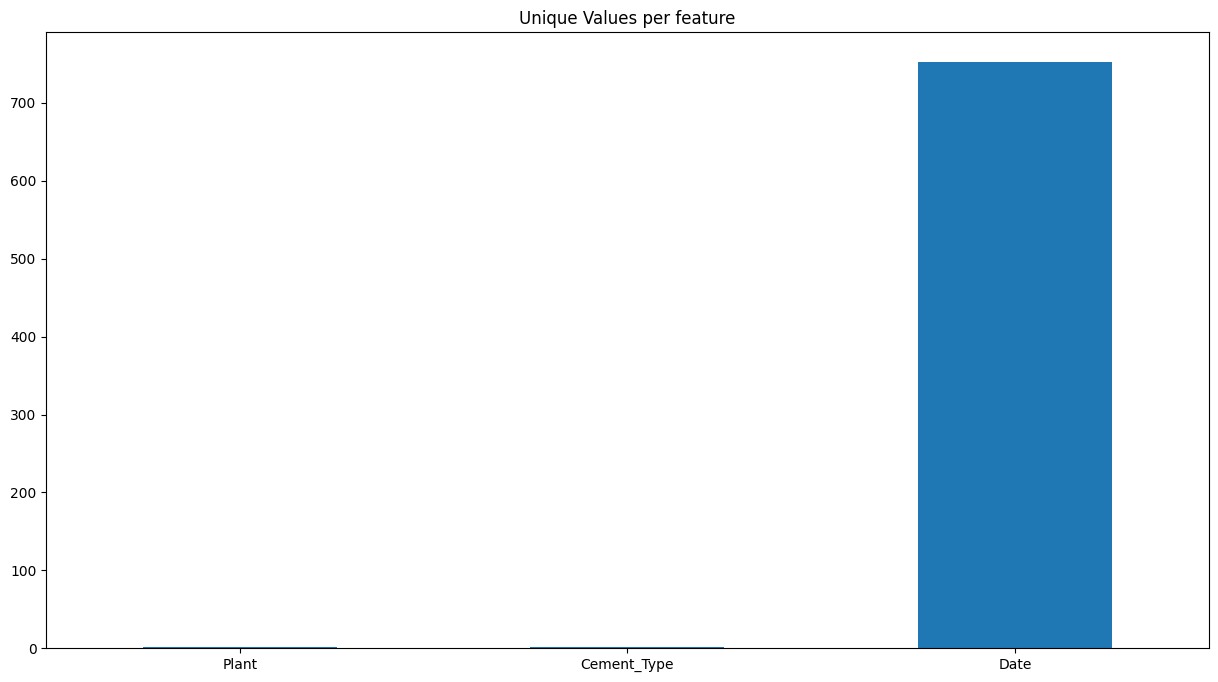

<IPython.core.display.Javascript object>

In [37]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'Plant'), Text(1, 0, 'Cement_Type')])

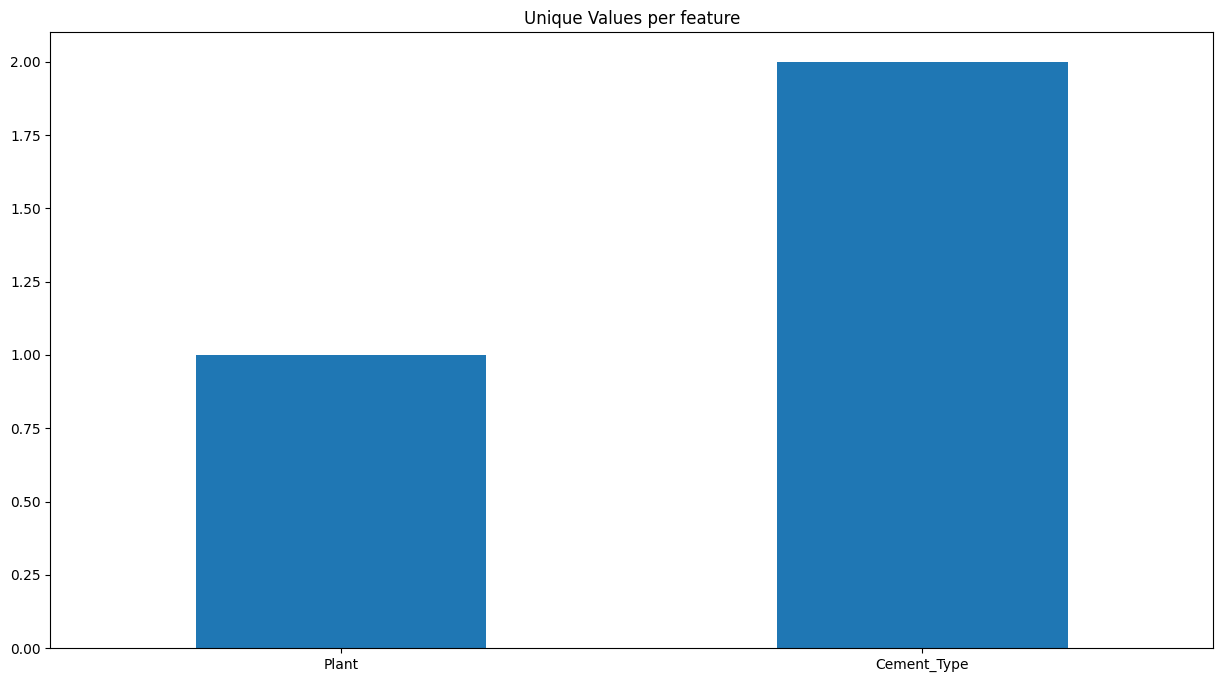

<IPython.core.display.Javascript object>

In [38]:
unique_values = (
    df.select_dtypes(exclude="number").drop("Date", axis=1).nunique().sort_values()
)

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [39]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 17 variables with missing values from a total of 25


<IPython.core.display.Javascript object>

In [40]:
df.isna().any()

Plant                   False
Date                    False
CaO                      True
MgO                      True
Na2O                     True
Al2O3                    True
SiO2                     True
SO3                      True
K2O                      True
TiO2                     True
Fe2O3                    True
Loss on Ignition         True
Insoluble Residue        True
Blaine                  False
#200                    False
#325                     True
#400                     True
Specific Gravity         True
Initial setting time    False
Final setting time      False
CS1                     False
CS3                      True
CS7                      True
CS28                     True
Cement_Type             False
dtype: bool

<IPython.core.display.Javascript object>

In [41]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [42]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 25 artists>

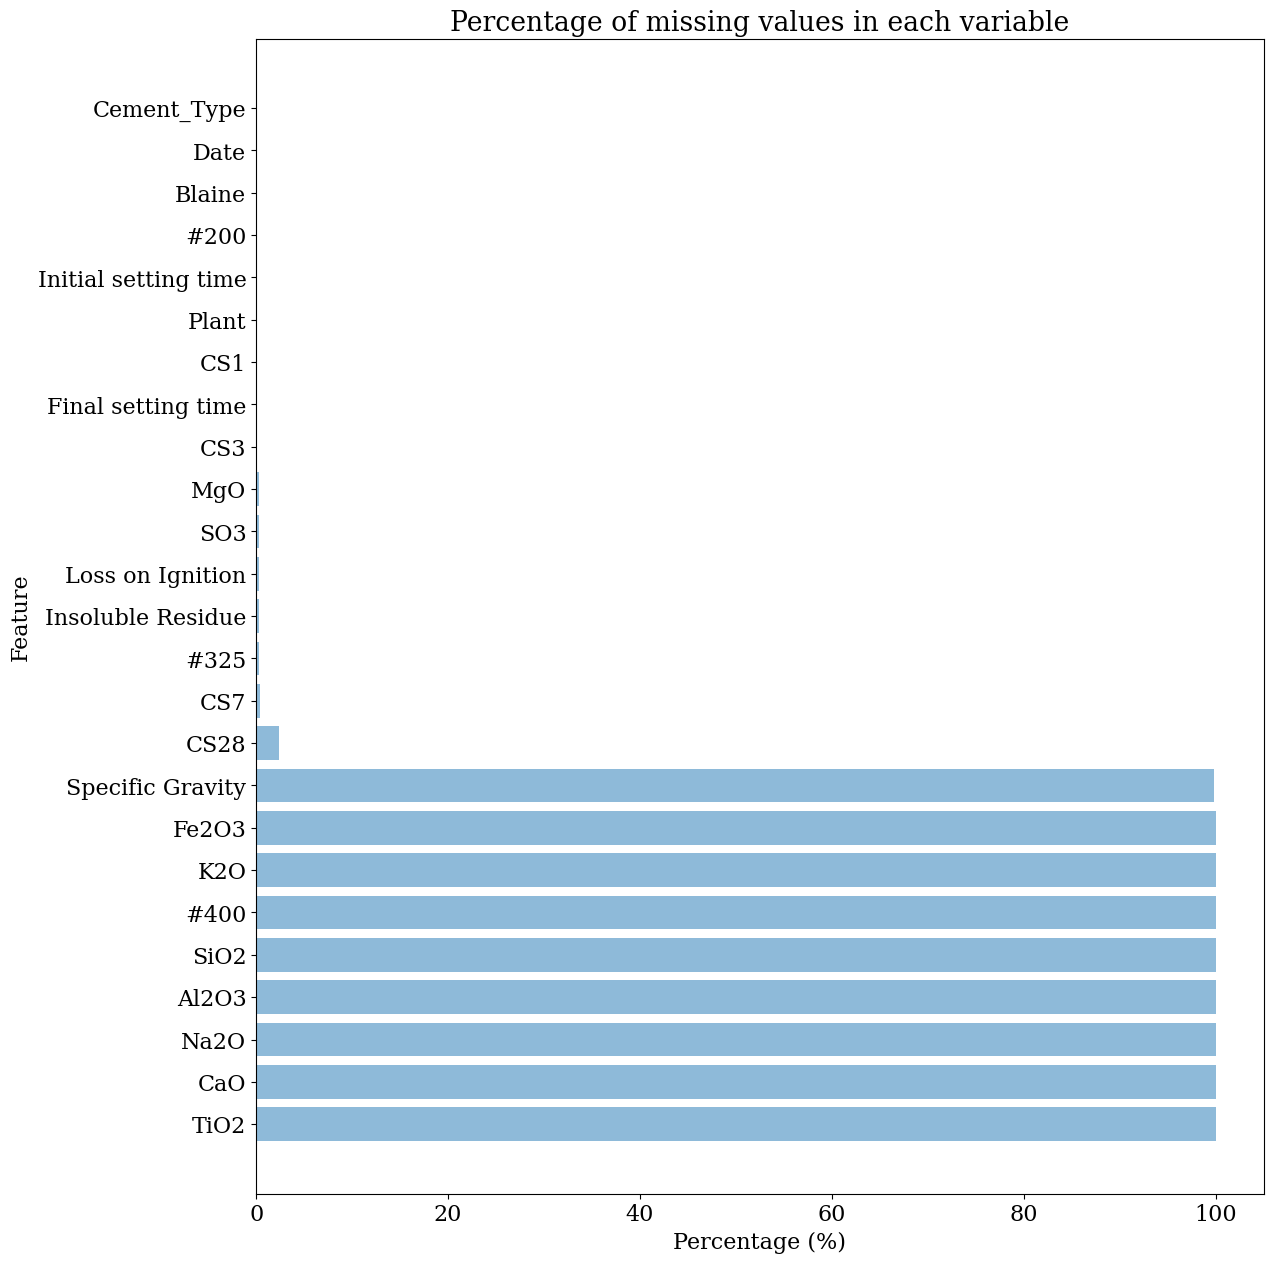

<IPython.core.display.Javascript object>

In [43]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [44]:
missing_values = []
for plant, group in df.groupby("Plant"):
    missing_percentages = (group.isna().sum() / group.shape[0]) * 100
    missing_percentages = missing_percentages.sort_values(ascending=False)
    missing_percentages = missing_percentages.to_frame(name=f"Missing (%) for {plant}")
    missing_values.append(missing_percentages.T)

result = pd.concat(missing_values)
result.T.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<h3>2.4. Duplicates</h3>

In [45]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 2 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

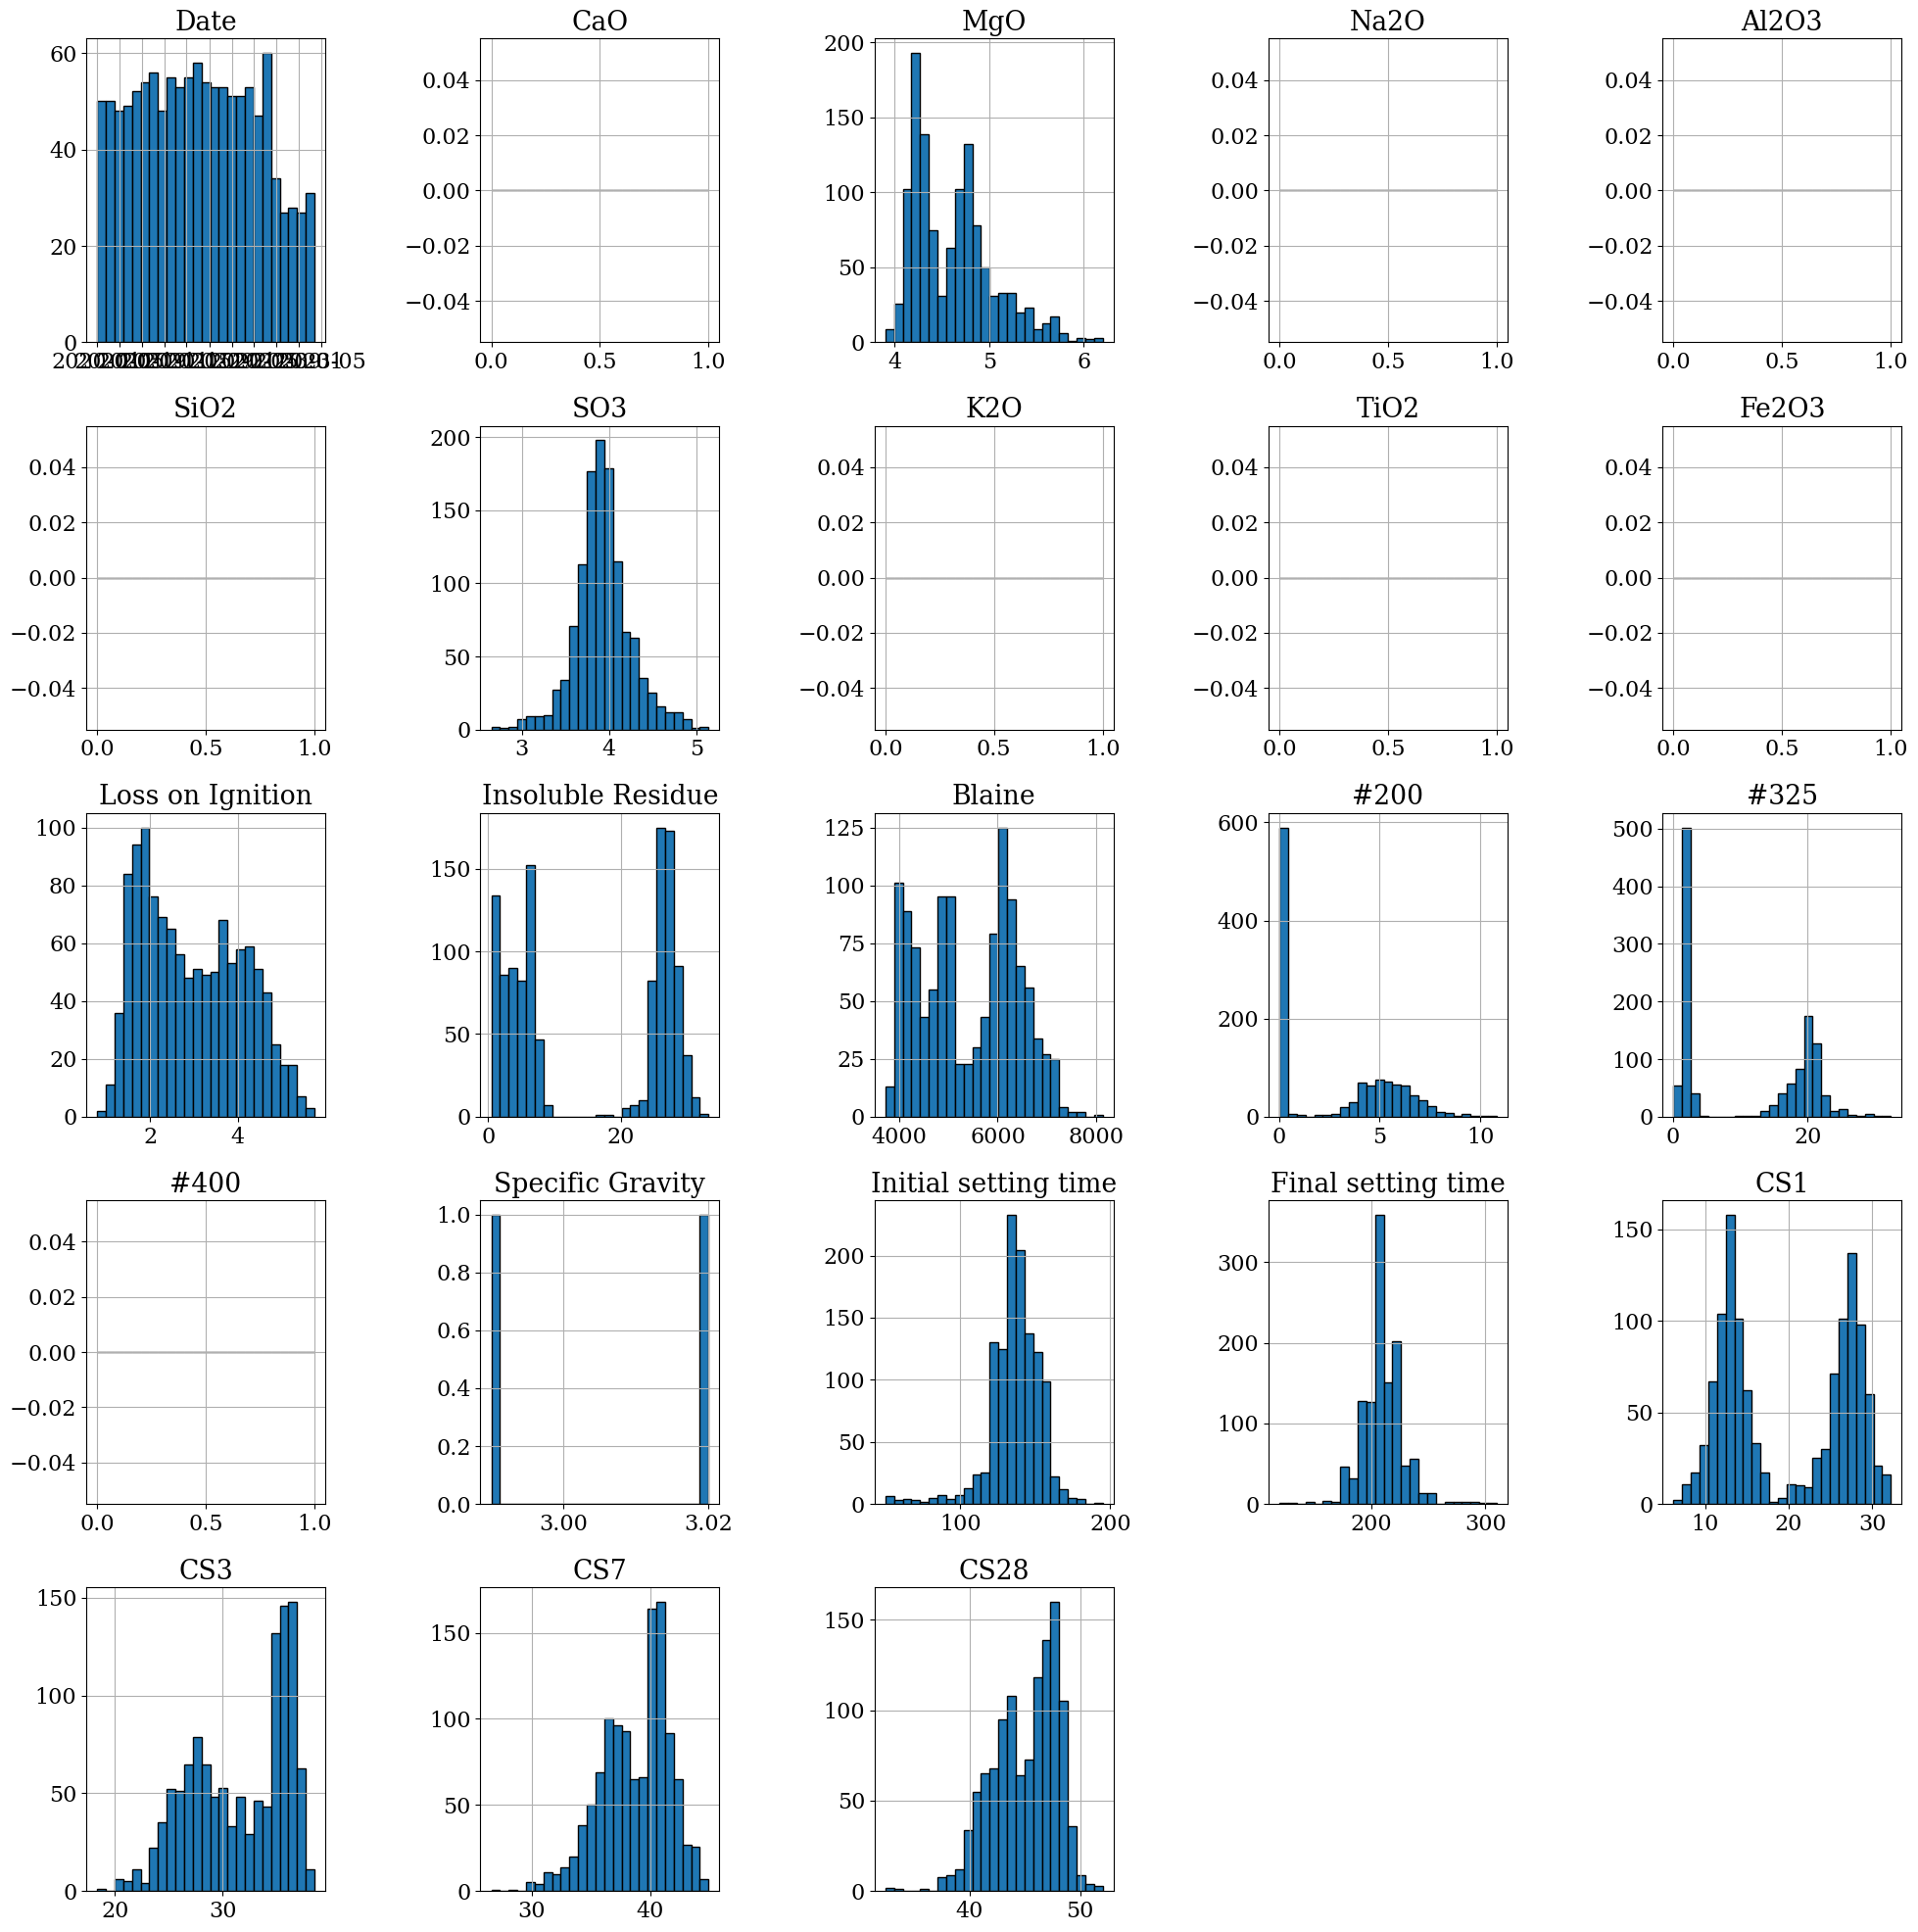

<IPython.core.display.Javascript object>

In [46]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

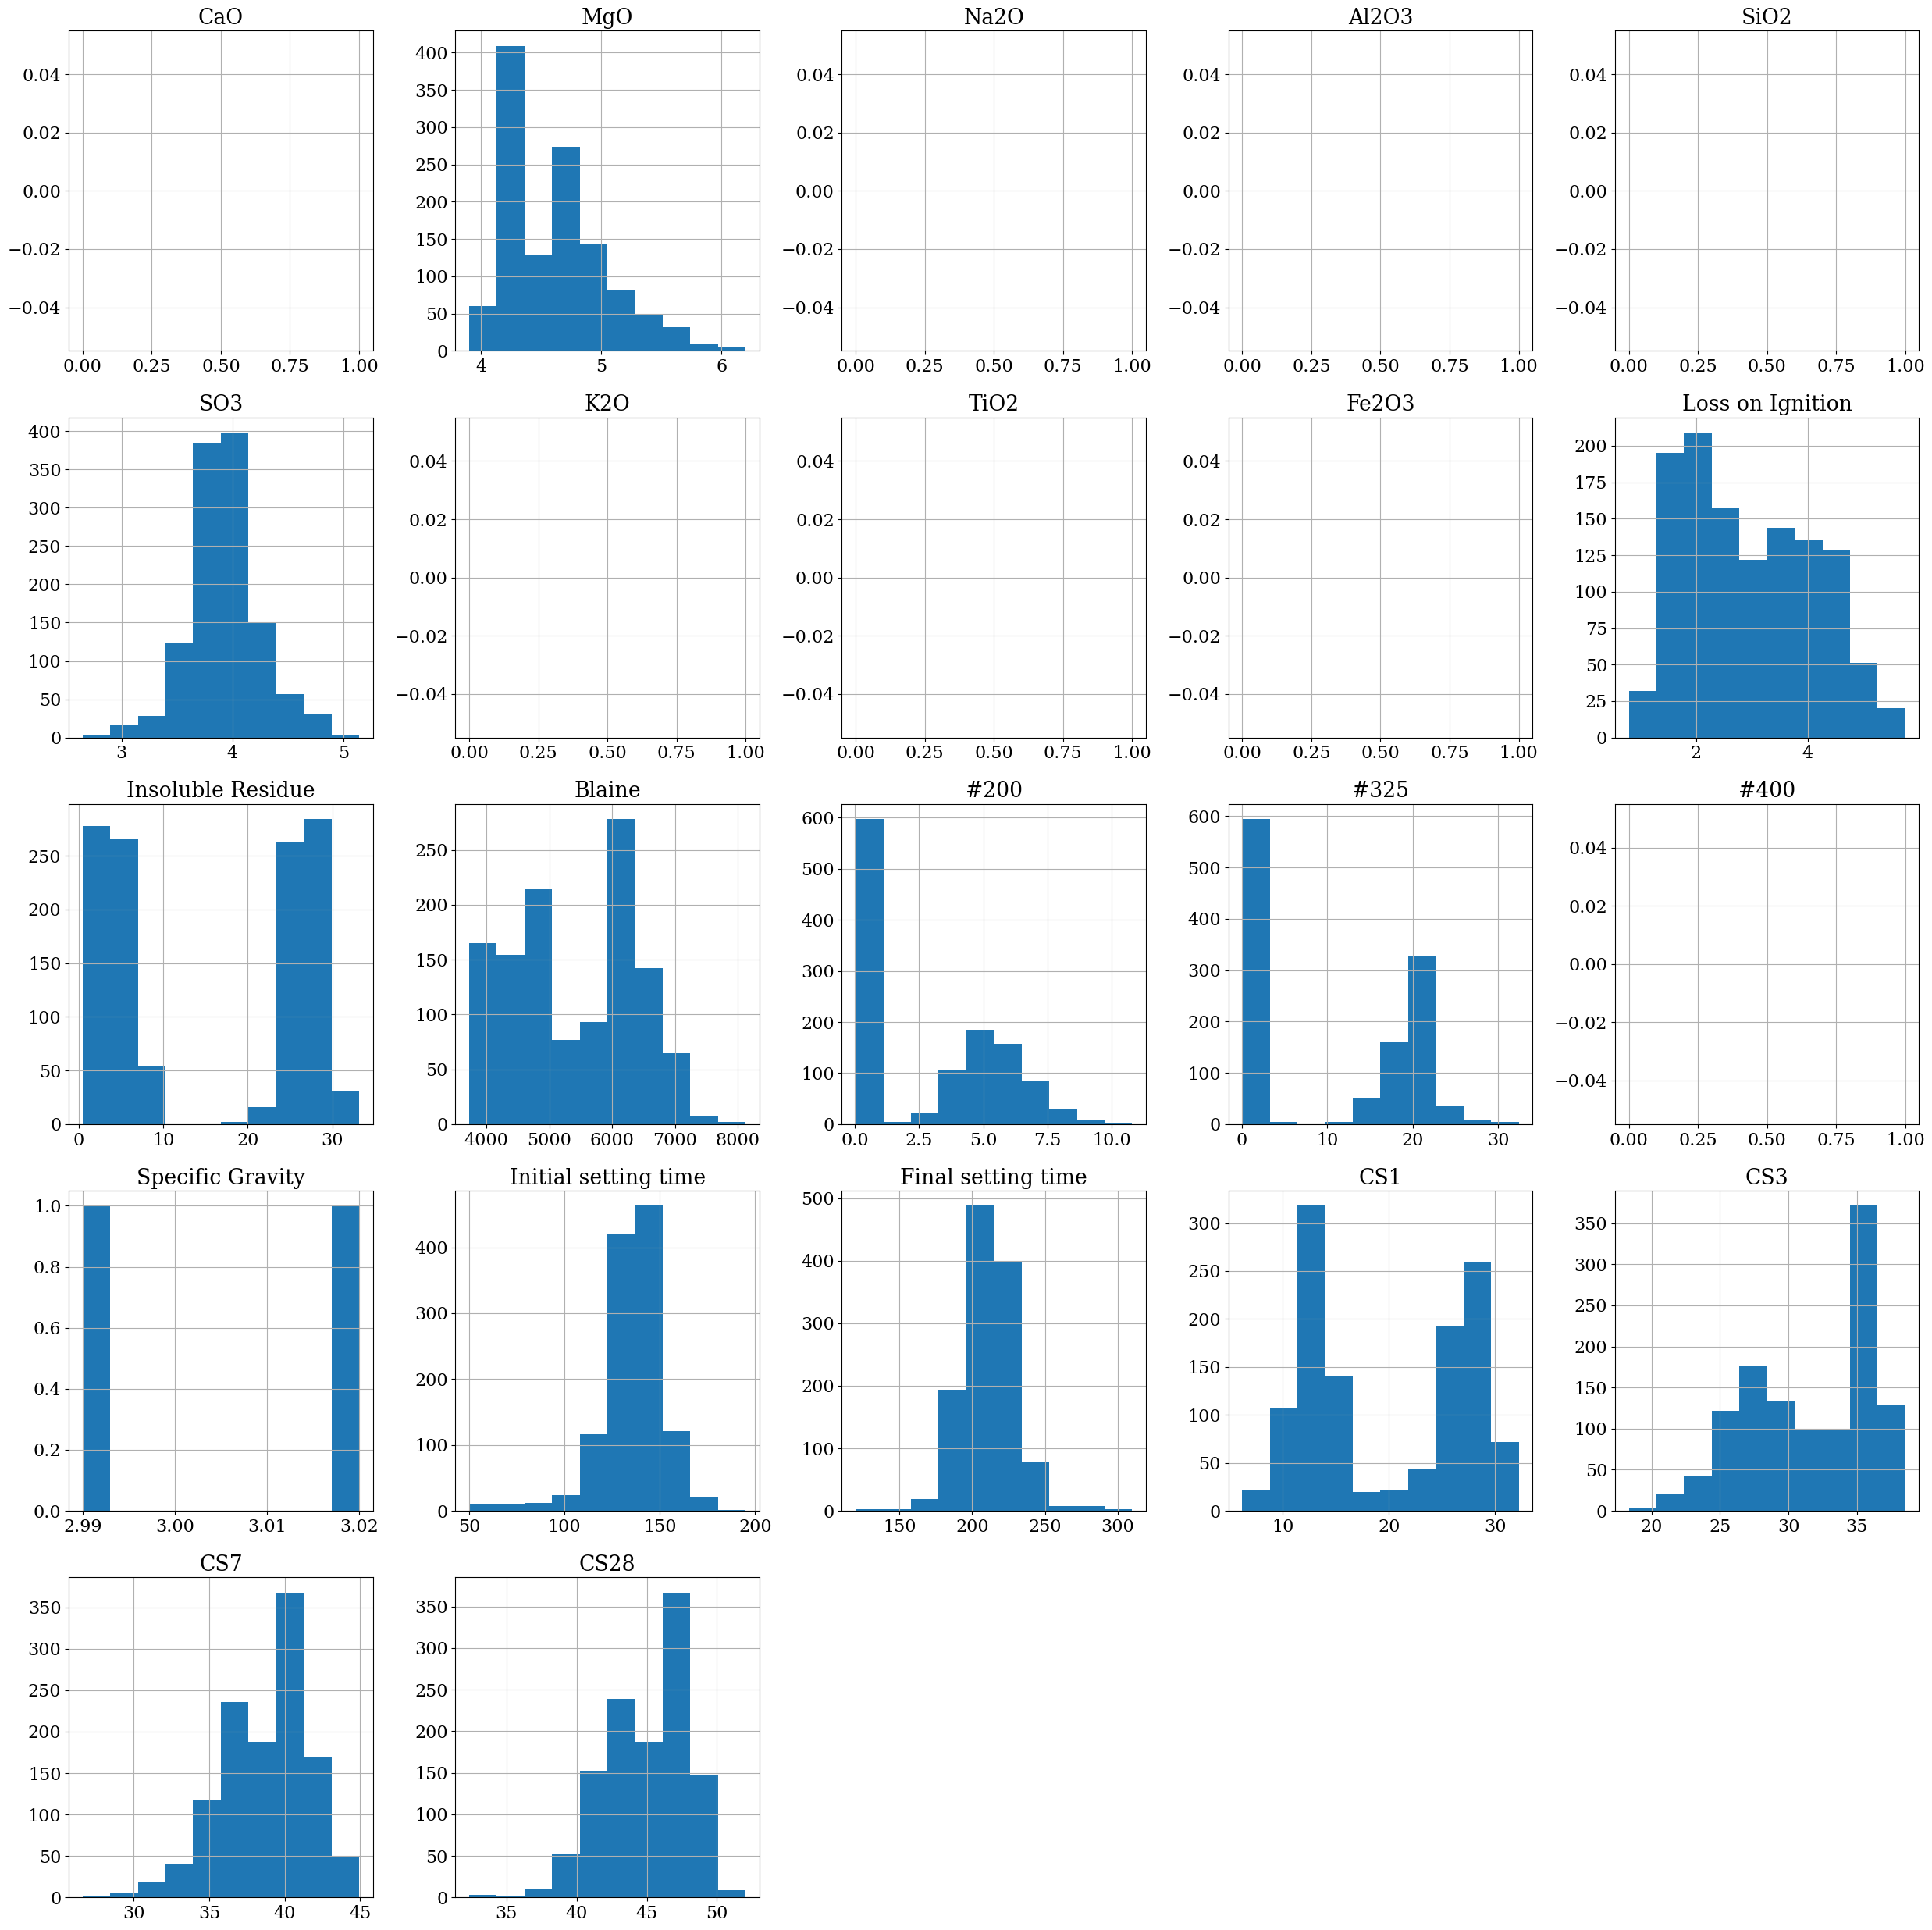

<IPython.core.display.Javascript object>

In [47]:
df.select_dtypes(include="float64").hist(
    figsize=(25, 25),
)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

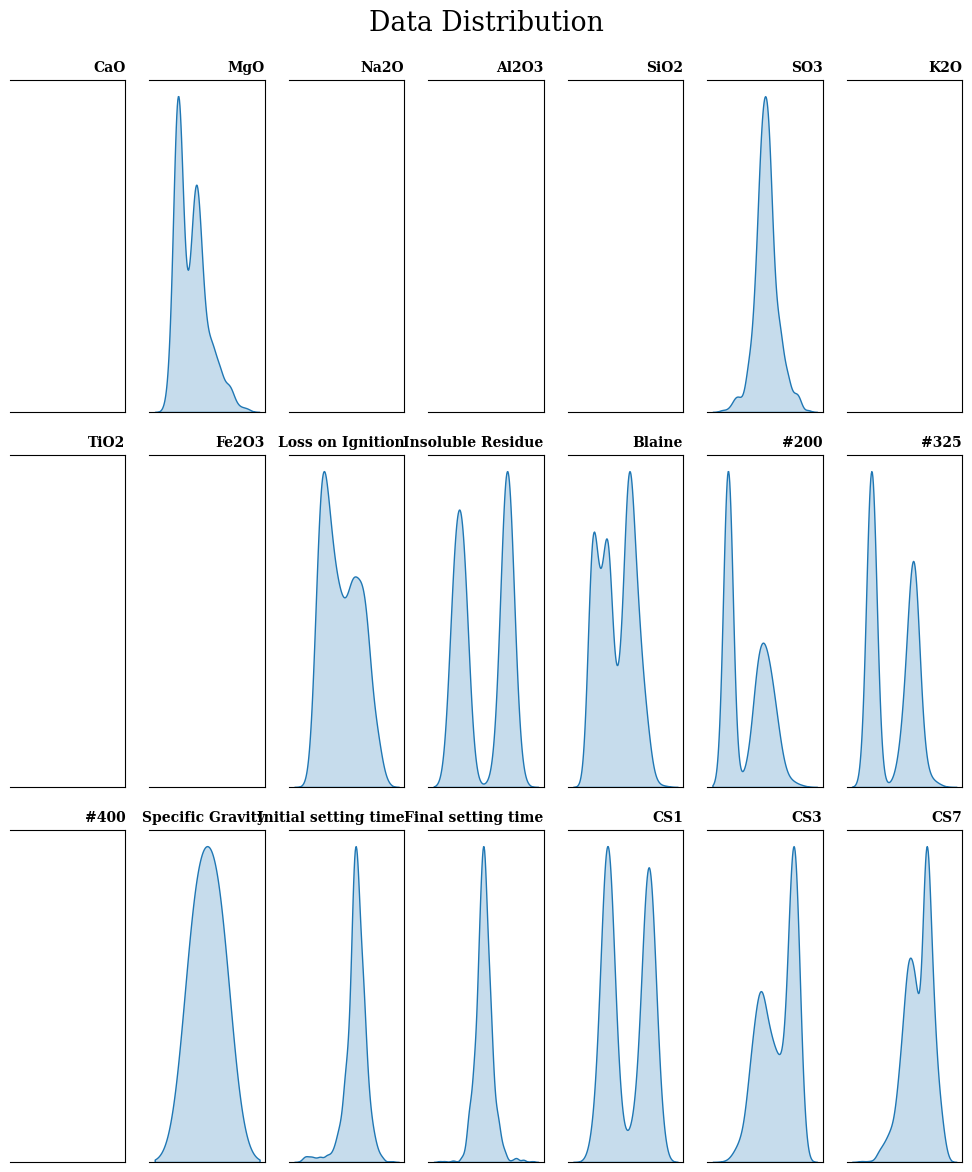

<IPython.core.display.Javascript object>

In [48]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(3, 7, figsize=(10, 12))
axes = axes.flatten()
# sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], fill=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

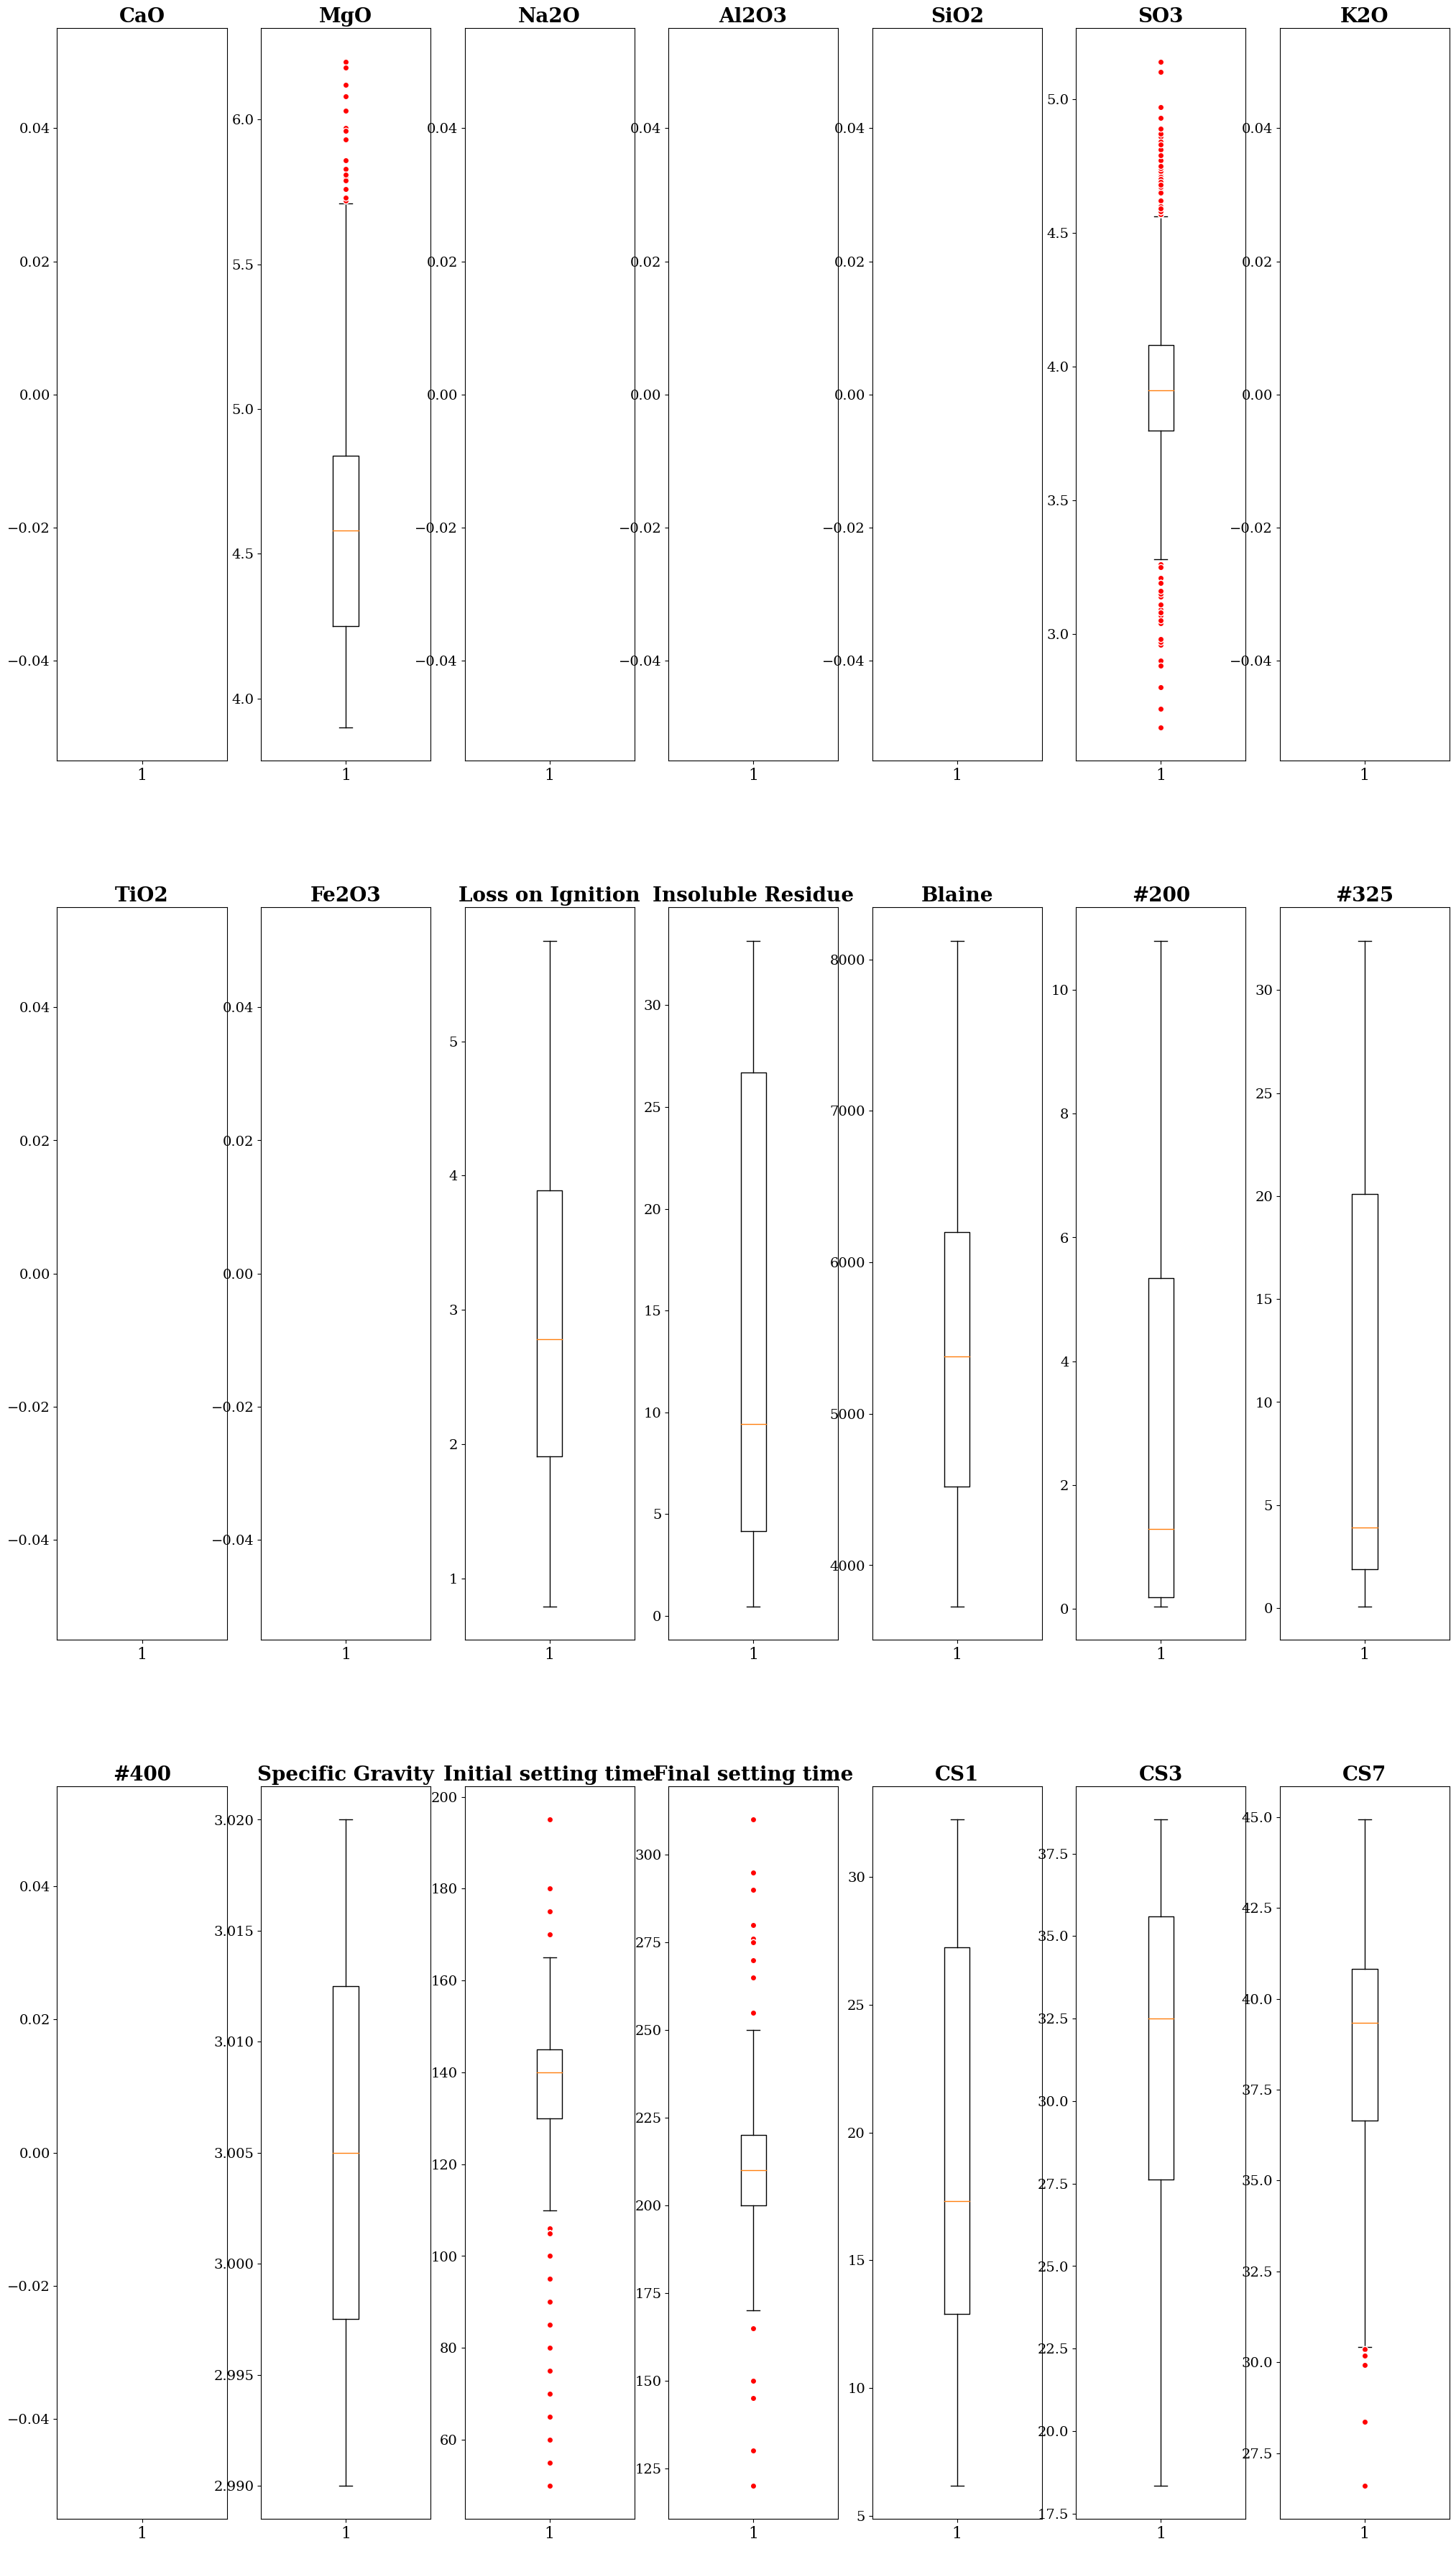

<IPython.core.display.Javascript object>

In [49]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(3, 7, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

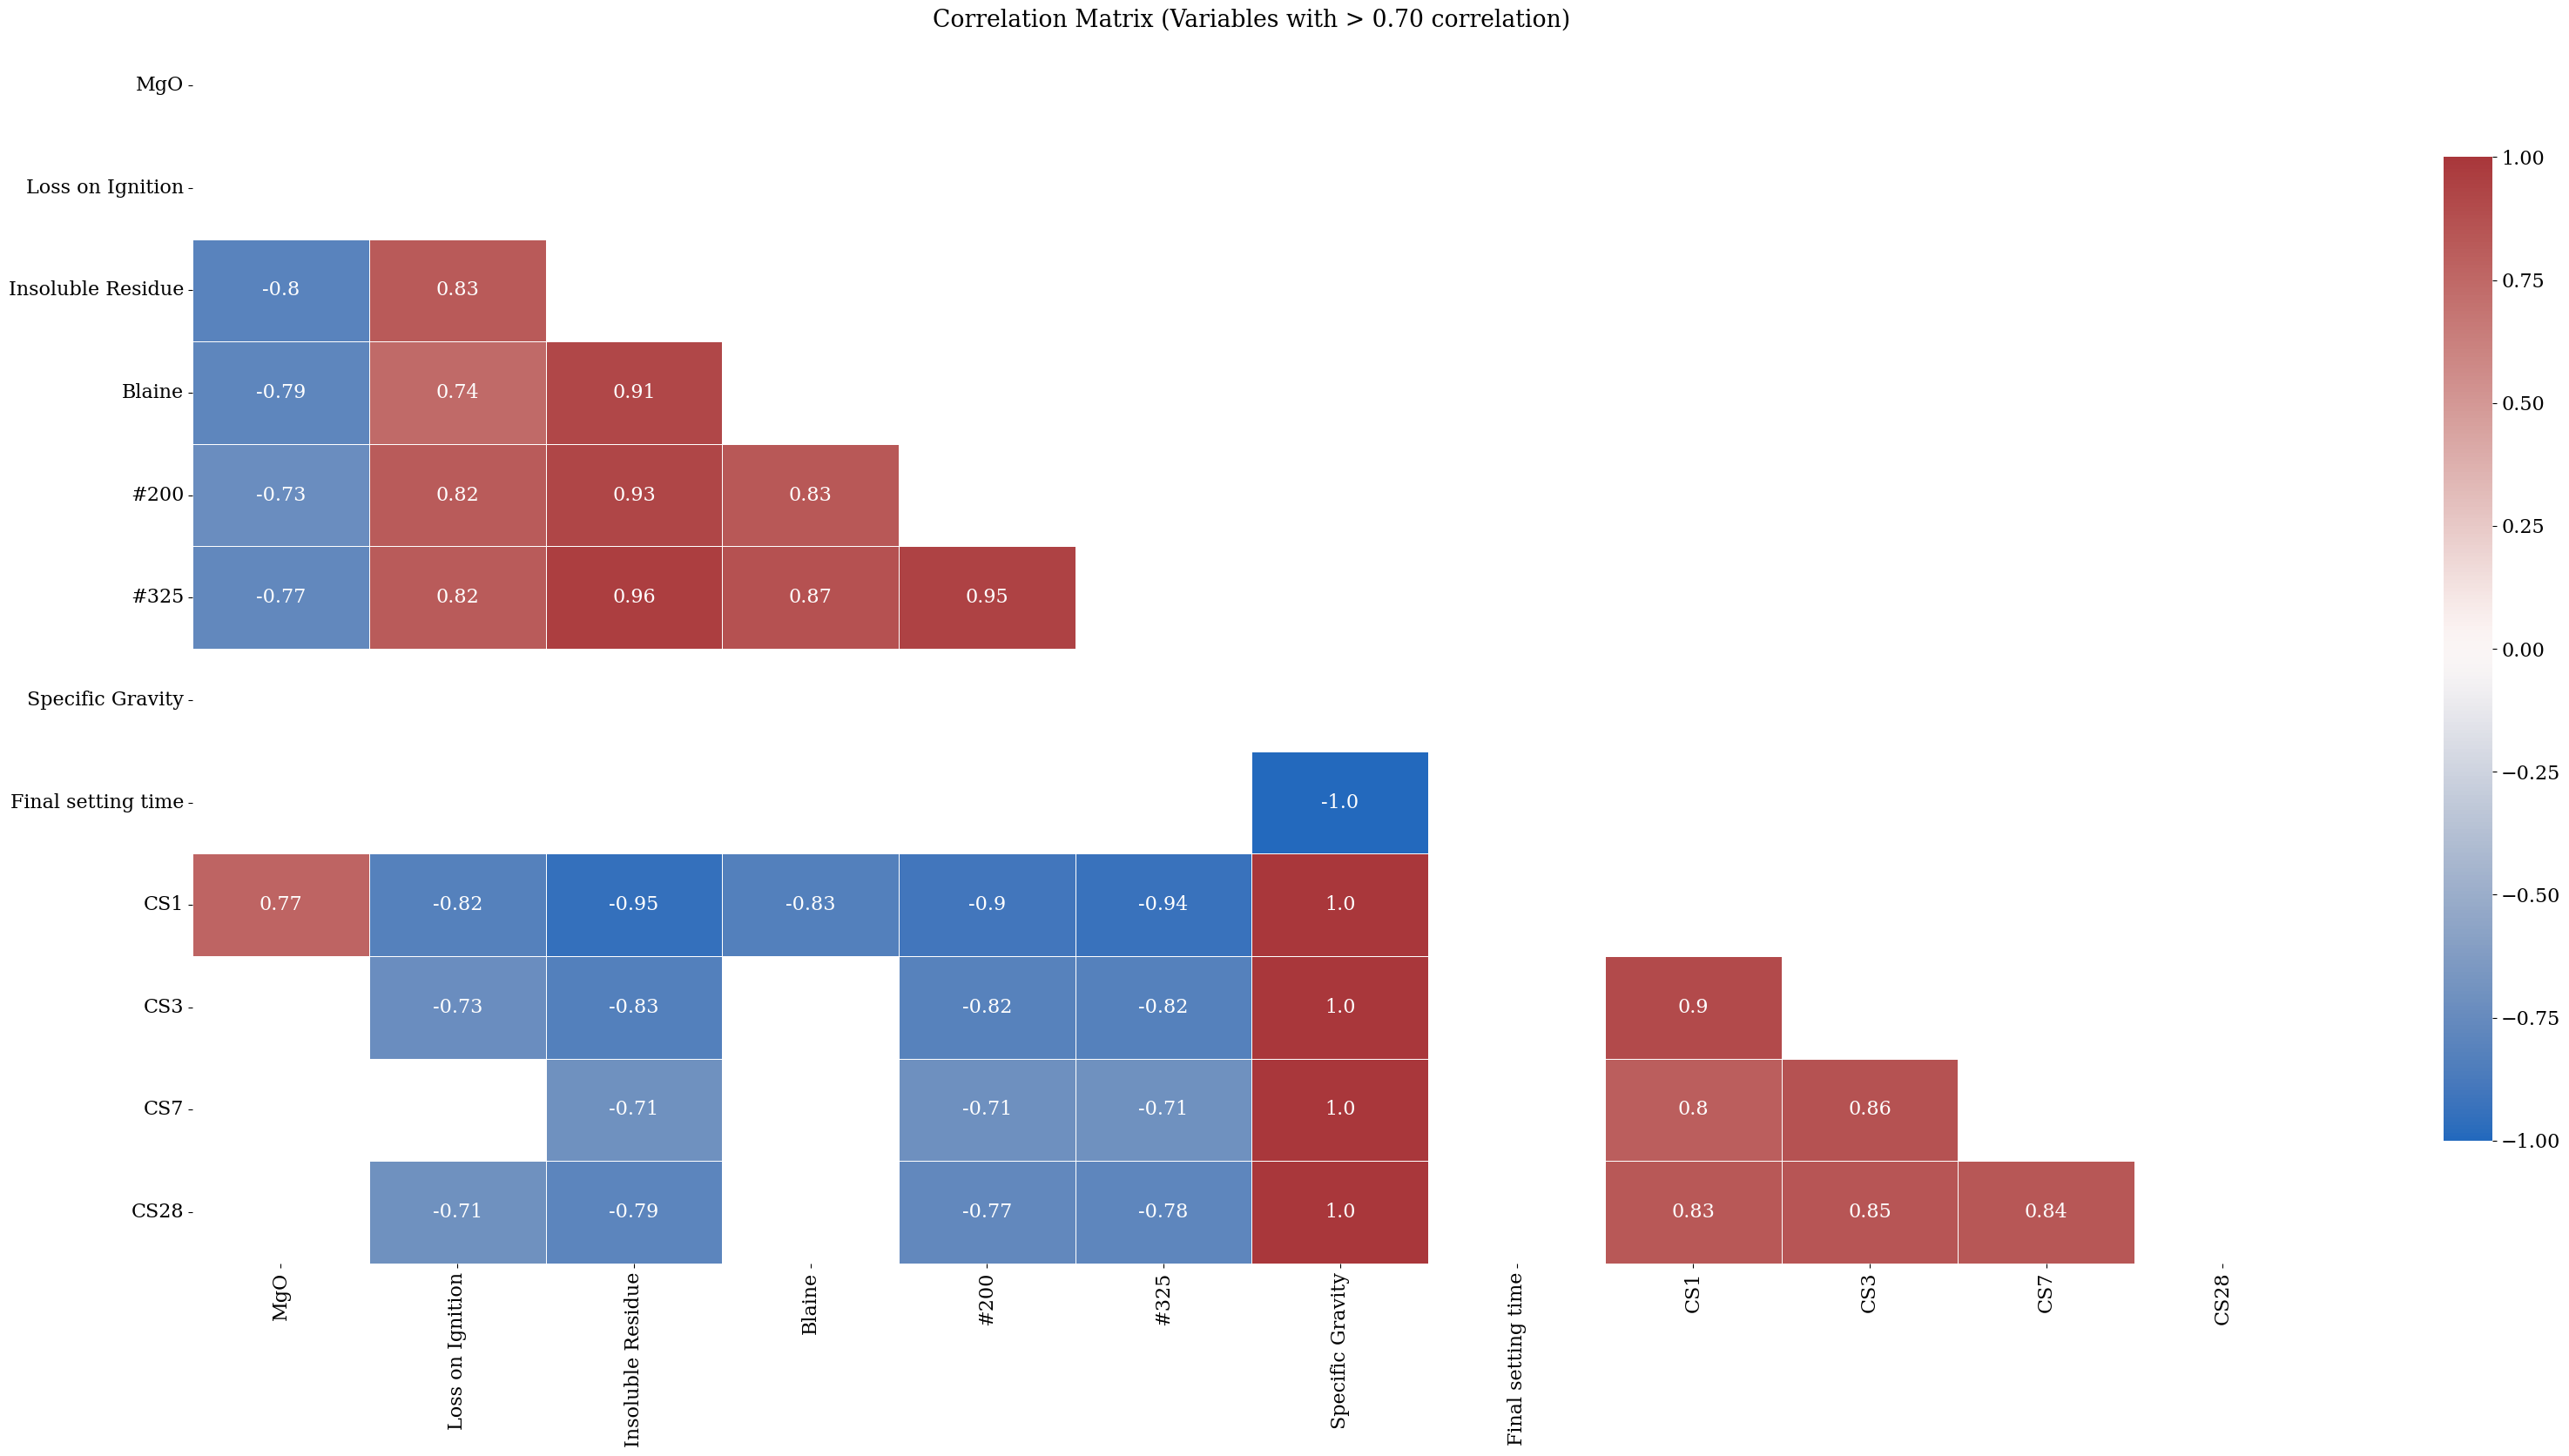

<IPython.core.display.Javascript object>

In [50]:
df_corr = df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="pearson")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [51]:
corr_matrix = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="pearson").abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

SO3                Specific Gravity      1.000000
Loss on Ignition   Specific Gravity      1.000000
Insoluble Residue  Specific Gravity      1.000000
#200               Specific Gravity      1.000000
#325               Specific Gravity      1.000000
Blaine             Specific Gravity      1.000000
MgO                Specific Gravity      1.000000
Specific Gravity   CS1                   1.000000
                   CS7                   1.000000
                   Final setting time    1.000000
                   CS28                  1.000000
                   CS3                   1.000000
Insoluble Residue  #325                  0.960959
                   CS1                   0.946814
#200               #325                  0.945277
#325               CS1                   0.935436
Insoluble Residue  #200                  0.928260
                   Blaine                0.914207
CS1                CS3                   0.899935
#200               CS1                   0.899687


<IPython.core.display.Javascript object>

In [52]:
sol[sol.index.map(lambda x: "CS28" in x)]

Specific Gravity      CS28    1.000000
CS3                   CS28    0.847735
CS7                   CS28    0.838909
CS1                   CS28    0.829858
Insoluble Residue     CS28    0.794528
#325                  CS28    0.784982
#200                  CS28    0.769199
Loss on Ignition      CS28    0.709299
Blaine                CS28    0.669200
MgO                   CS28    0.668453
SO3                   CS28    0.315554
Final setting time    CS28    0.229581
Initial setting time  CS28    0.114198
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

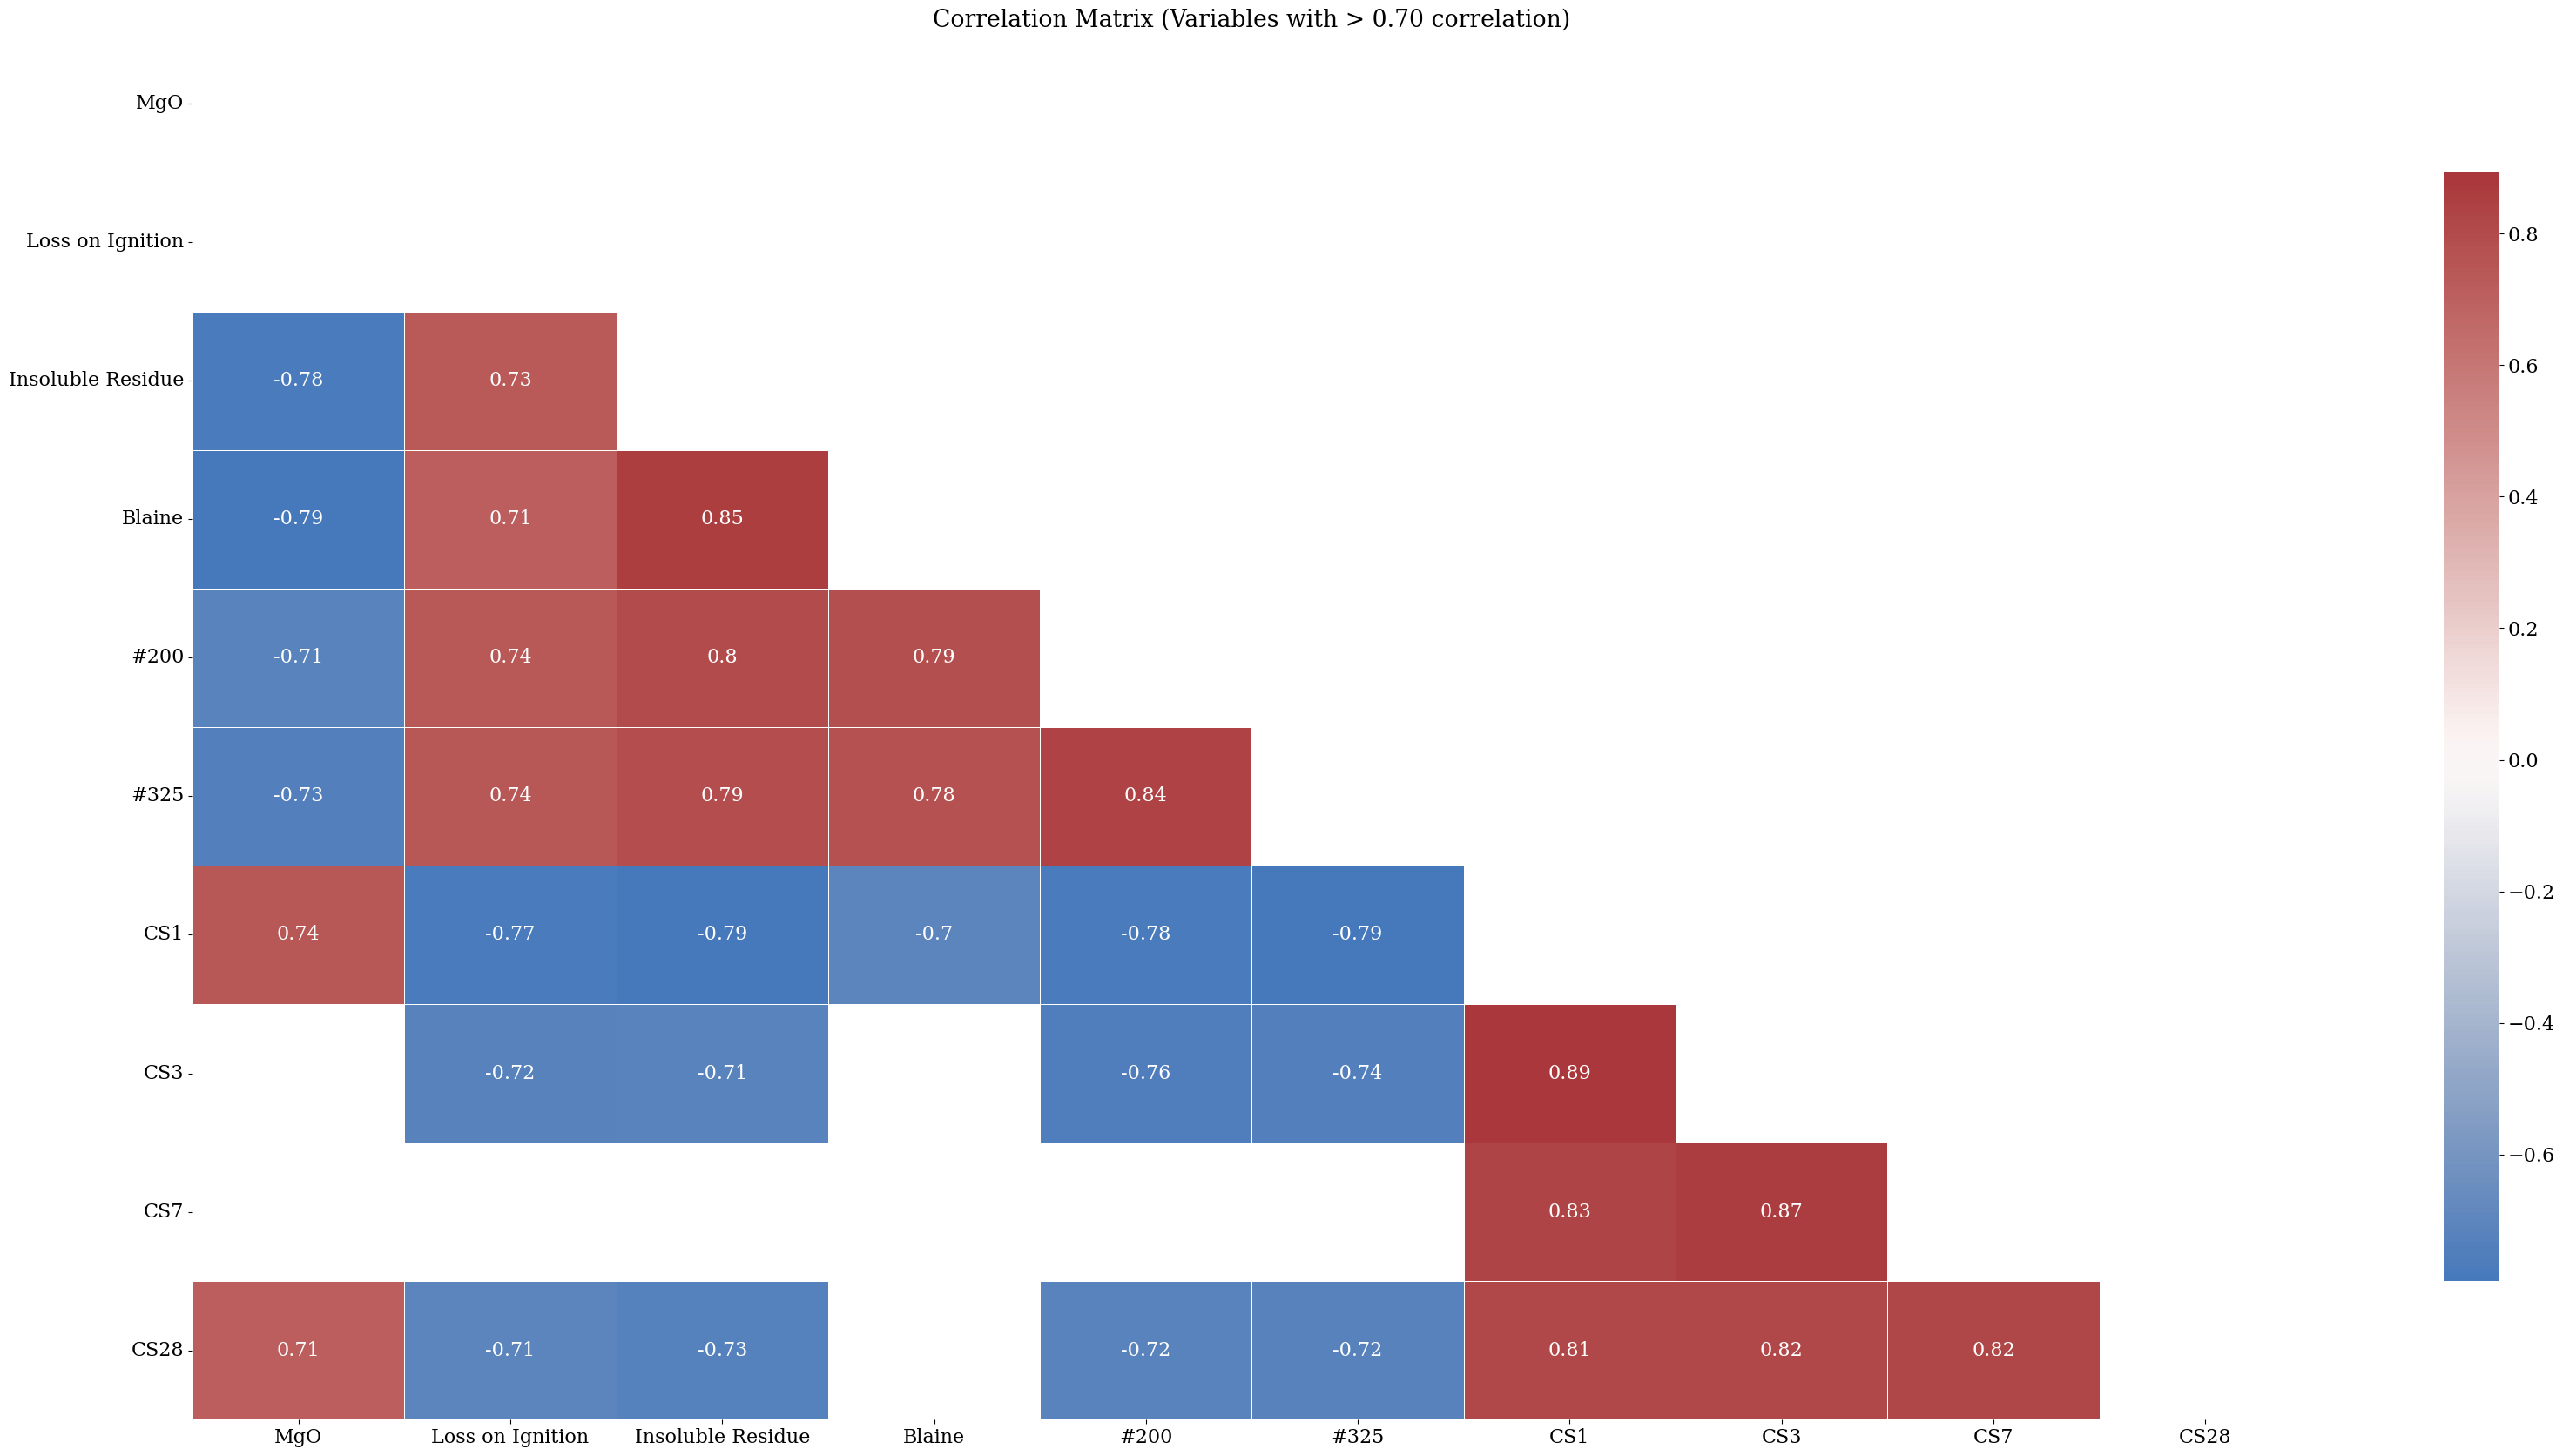

<IPython.core.display.Javascript object>

In [53]:
df_corr = df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="spearman")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [54]:
corr_matrix = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="spearman").abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

SO3                Specific Gravity      1.000000
Specific Gravity   CS3                   1.000000
Insoluble Residue  Specific Gravity      1.000000
Loss on Ignition   Specific Gravity      1.000000
Blaine             Specific Gravity      1.000000
#200               Specific Gravity      1.000000
MgO                Specific Gravity      1.000000
#325               Specific Gravity      1.000000
Specific Gravity   Final setting time    1.000000
                   CS1                   1.000000
                   CS28                  1.000000
                   CS7                   1.000000
CS1                CS3                   0.892321
CS3                CS7                   0.865308
Insoluble Residue  Blaine                0.854103
#200               #325                  0.839309
CS1                CS7                   0.829583
CS7                CS28                  0.821874
CS3                CS28                  0.816552
CS1                CS28                  0.814871


<IPython.core.display.Javascript object>

In [55]:
sol[sol.index.map(lambda x: "CS28" in x)]

Specific Gravity      CS28    1.000000
CS7                   CS28    0.821874
CS3                   CS28    0.816552
CS1                   CS28    0.814871
Insoluble Residue     CS28    0.728215
#325                  CS28    0.723603
#200                  CS28    0.718768
MgO                   CS28    0.713758
Loss on Ignition      CS28    0.705451
Blaine                CS28    0.678311
SO3                   CS28    0.329033
Final setting time    CS28    0.250150
Initial setting time  CS28    0.005541
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

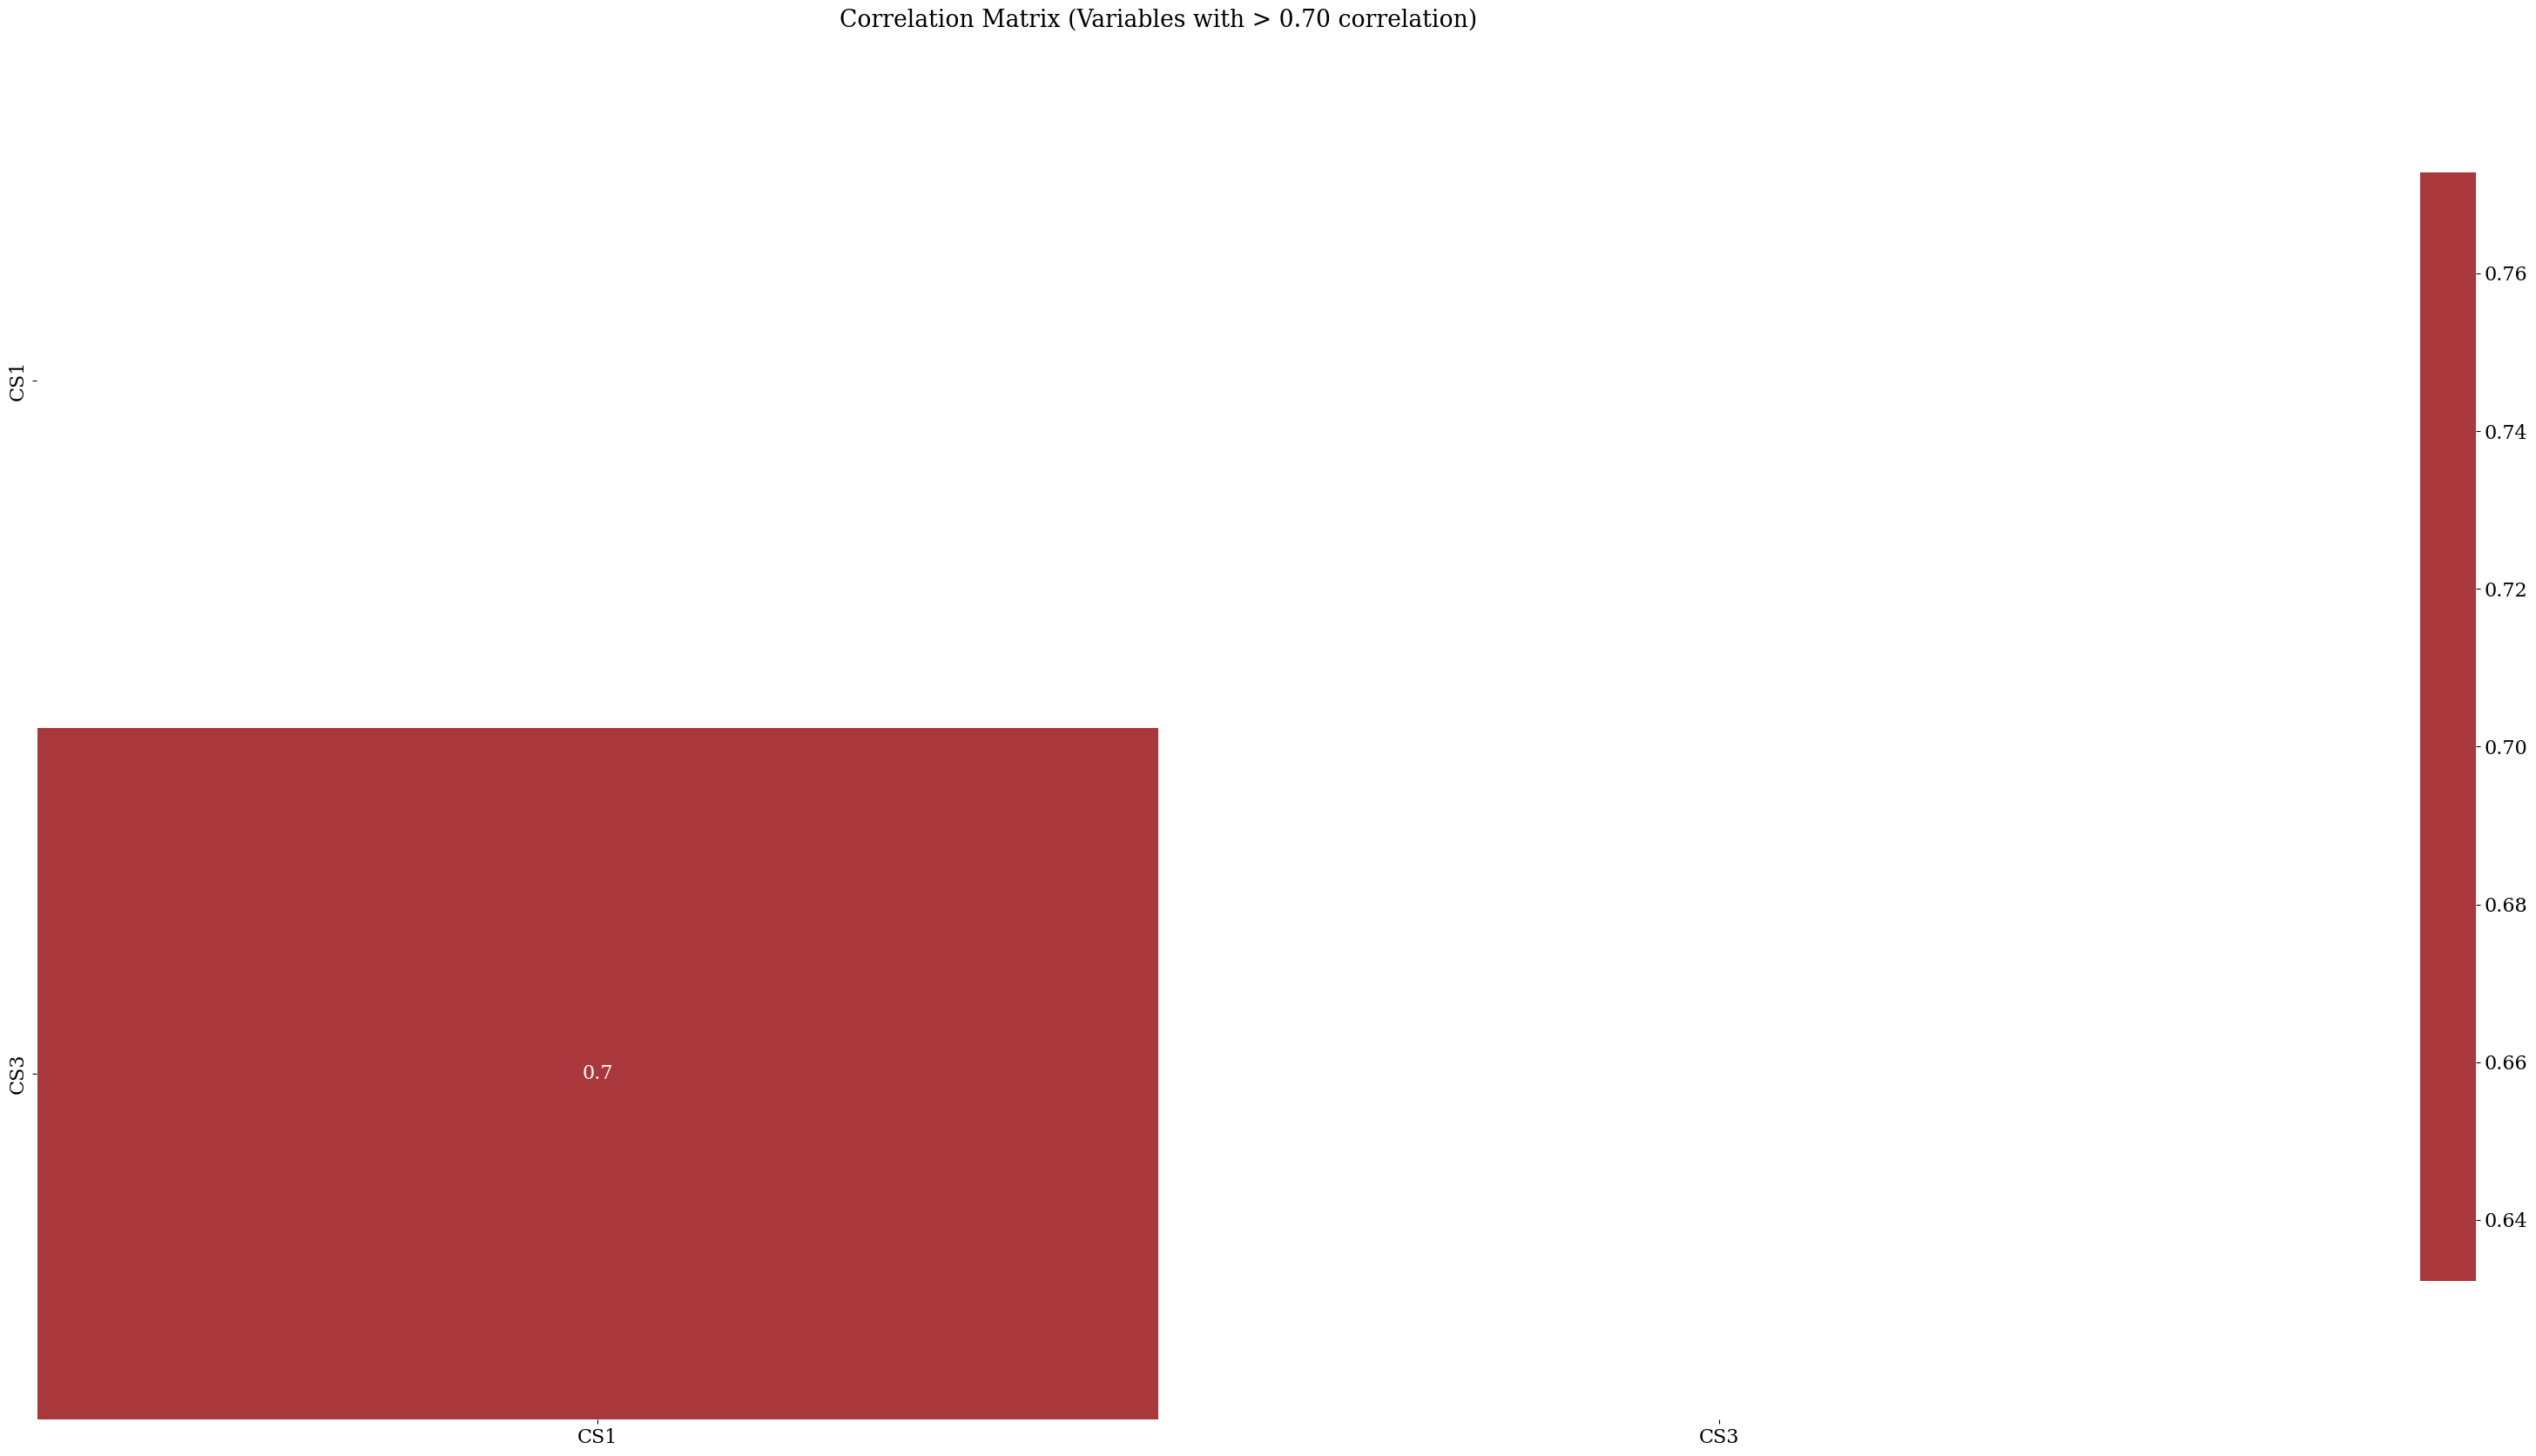

<IPython.core.display.Javascript object>

In [56]:
df_corr = df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="kendall")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [57]:
corr_matrix = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="kendall").abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

#325               Specific Gravity      1.000000
#200               Specific Gravity      1.000000
Specific Gravity   Final setting time    1.000000
                   CS1                   1.000000
                   CS3                   1.000000
                   CS7                   1.000000
                   CS28                  1.000000
SO3                Specific Gravity      1.000000
MgO                Specific Gravity      1.000000
Blaine             Specific Gravity      1.000000
Loss on Ignition   Specific Gravity      1.000000
Insoluble Residue  Specific Gravity      1.000000
CS1                CS3                   0.702499
dtype: float64

<IPython.core.display.Javascript object>

In [58]:
sol[sol.index.map(lambda x: "CS28" in x)]

Specific Gravity      CS28    1.000000
CS7                   CS28    0.618662
CS3                   CS28    0.604542
CS1                   CS28    0.601962
Insoluble Residue     CS28    0.501804
MgO                   CS28    0.497374
#200                  CS28    0.496212
#325                  CS28    0.494227
Loss on Ignition      CS28    0.483471
Blaine                CS28    0.446694
SO3                   CS28    0.215721
Final setting time    CS28    0.173219
Initial setting time  CS28    0.003419
dtype: float64

<IPython.core.display.Javascript object>

#### Bivariate Analysis

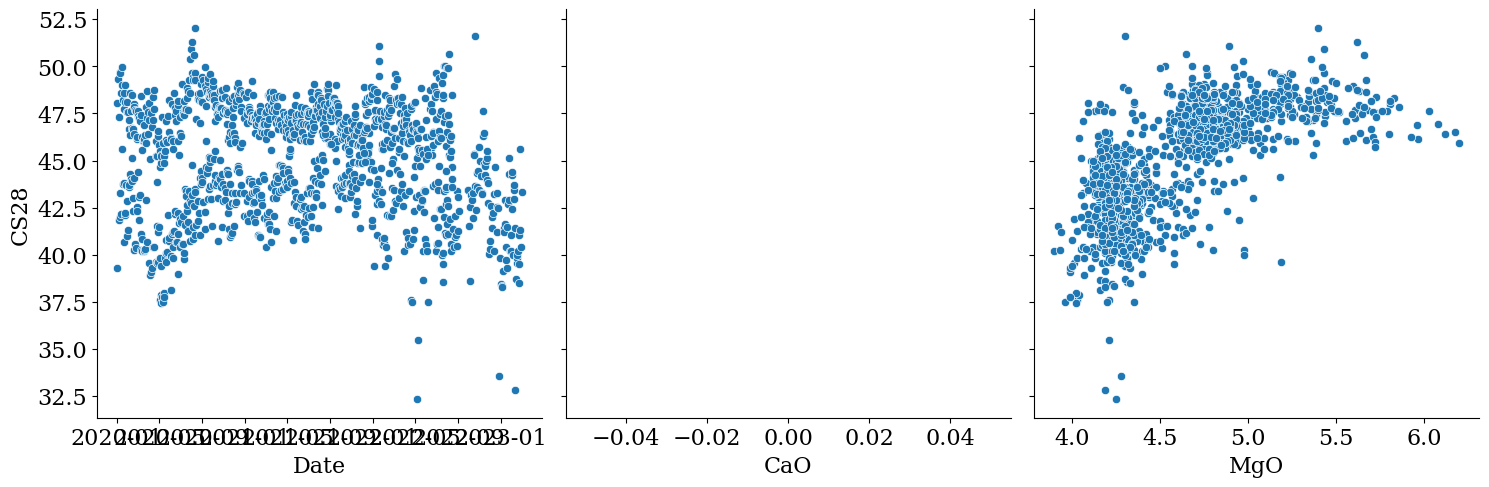

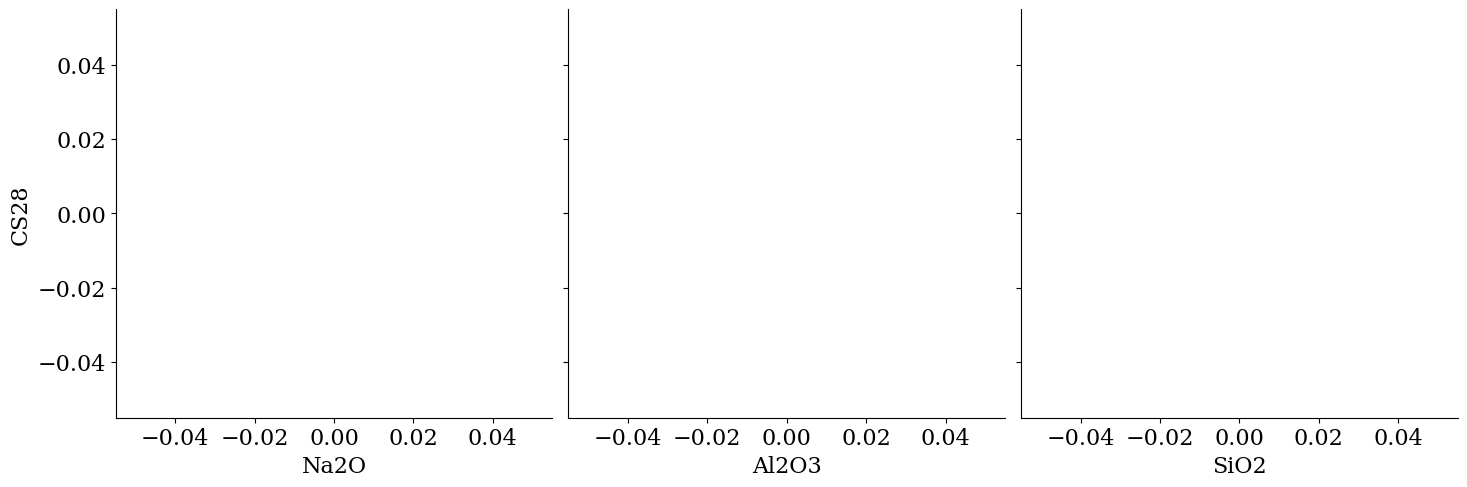

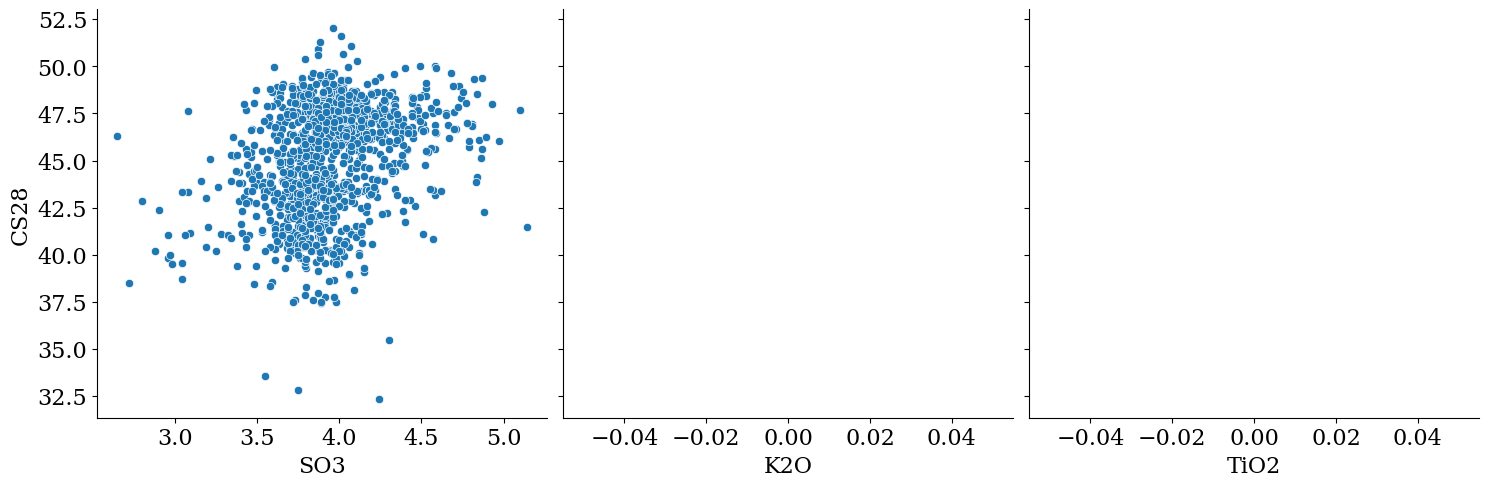

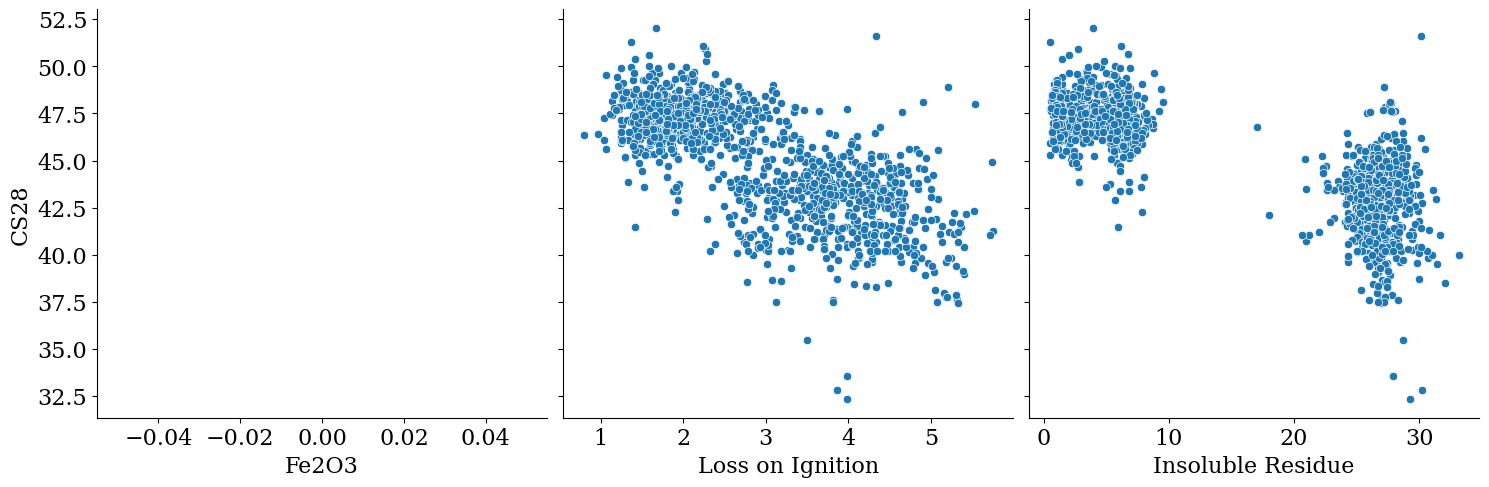

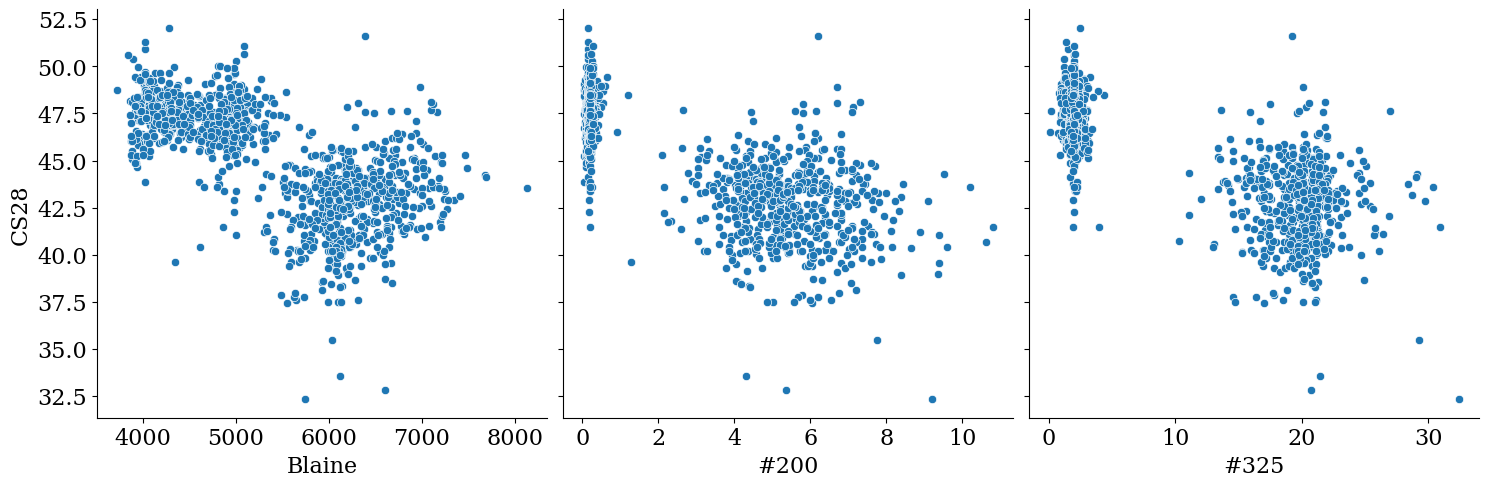

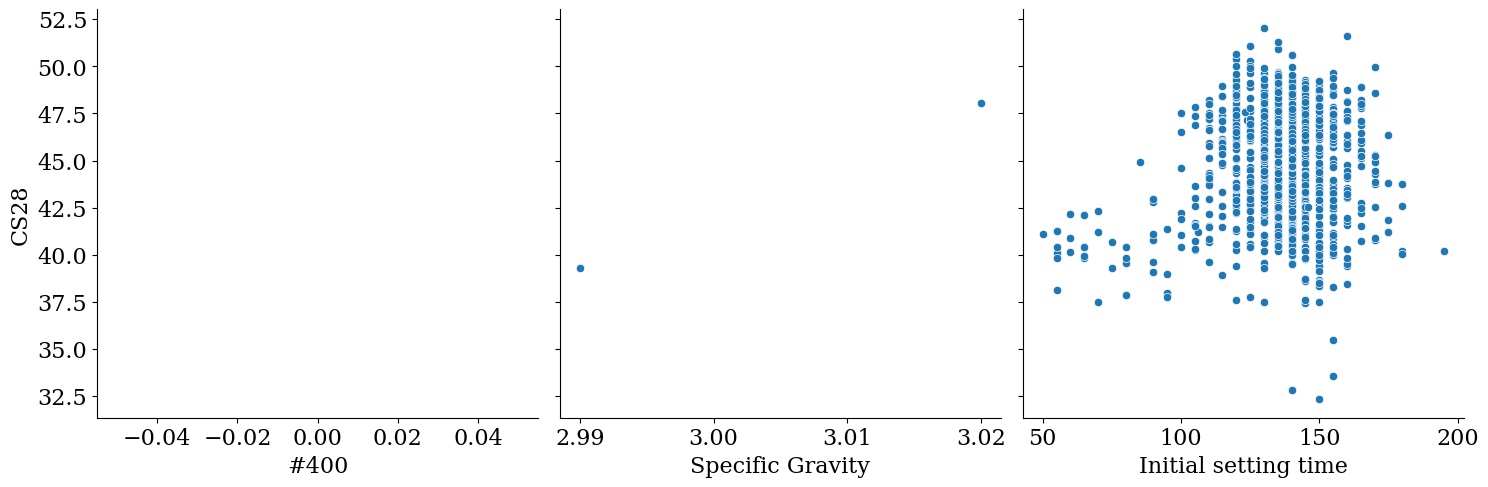

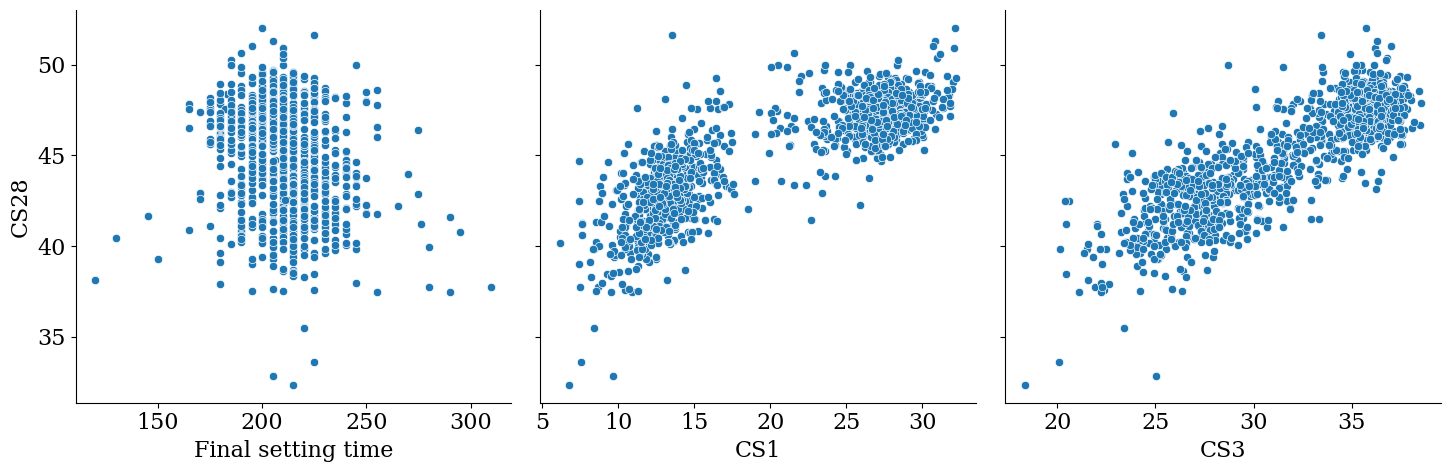

<IPython.core.display.Javascript object>

In [59]:
num_lines = 7
plots_per_line = 3

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("CS28")

warnings.filterwarnings("ignore")

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["CS28"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

# grid.fig.suptitle(
#     "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
# )
plt.tight_layout()
plt.show()

In [60]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

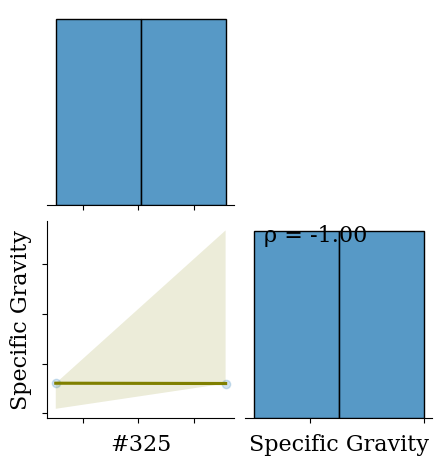

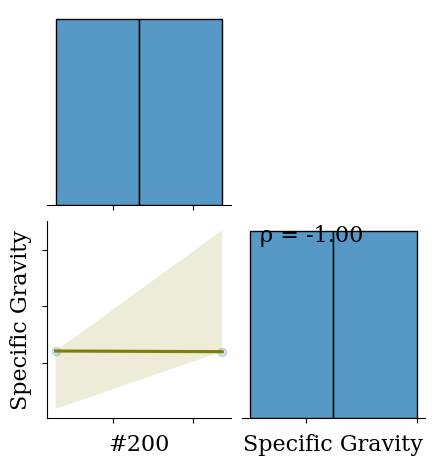

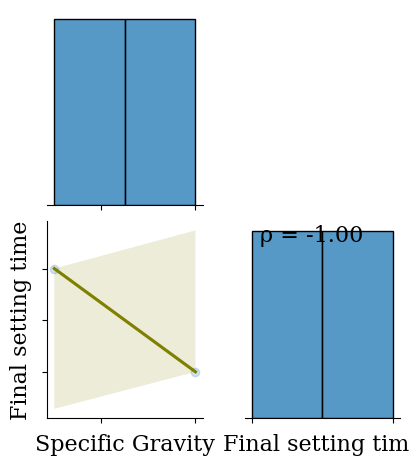

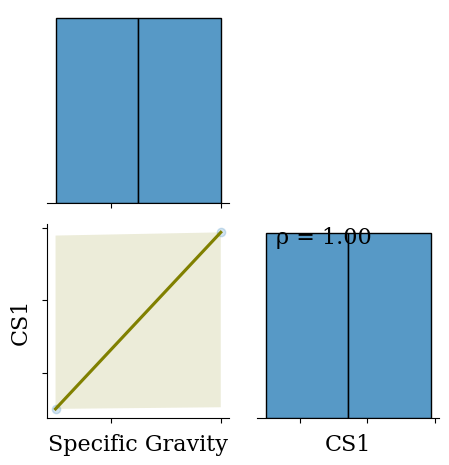

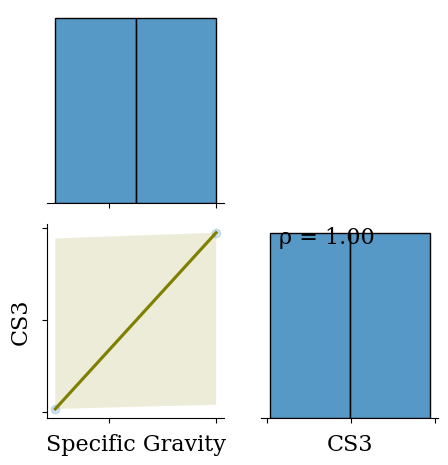

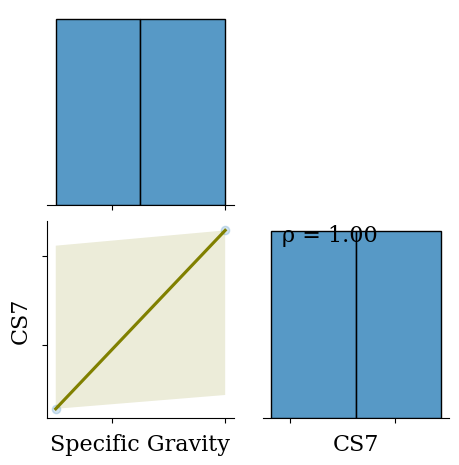

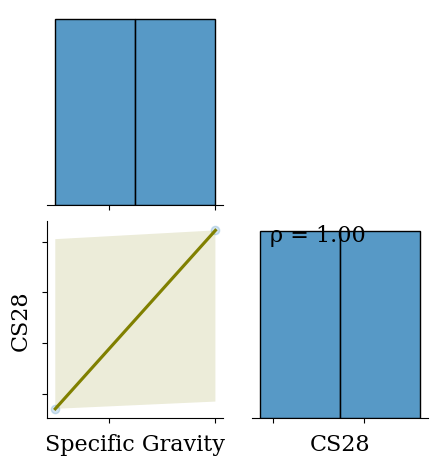

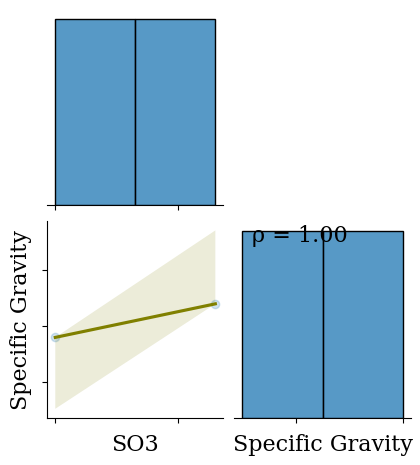

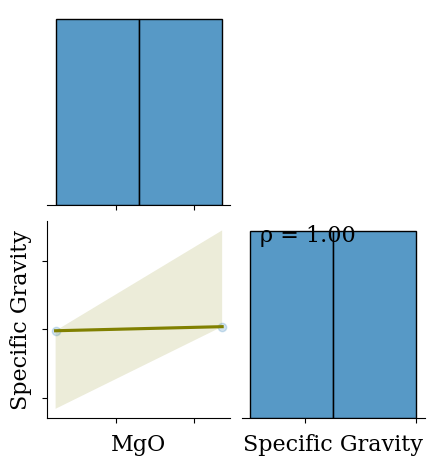

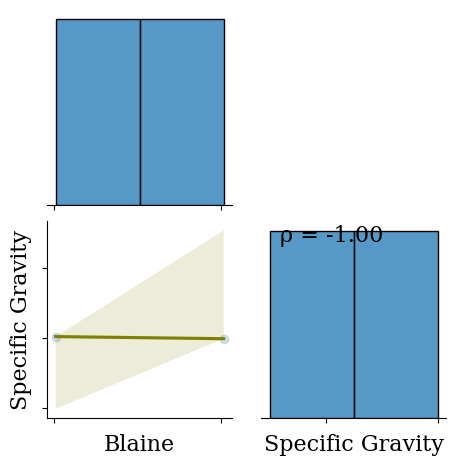

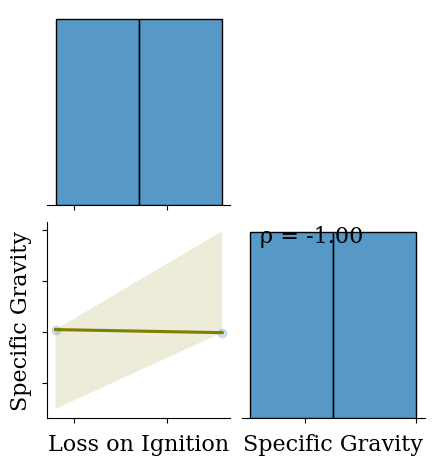

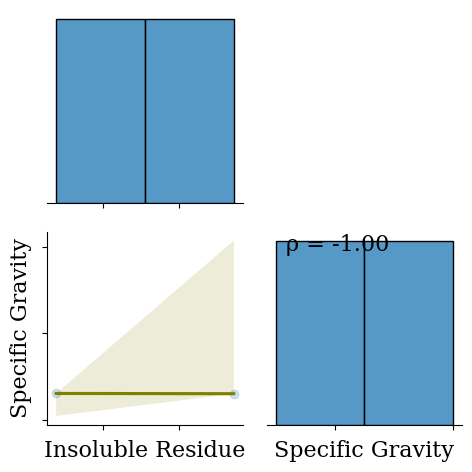

<IPython.core.display.Javascript object>

In [61]:
warnings.filterwarnings("ignore")

for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Date/TimeVariable Analyses

In [62]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

587 valid days out of 753


<IPython.core.display.Javascript object>

In [63]:
# What are the years the data was collected?
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2020, 2021, 2022, 2023}


<IPython.core.display.Javascript object>

In [64]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2023: {1, 2, 3}}

<IPython.core.display.Javascript object>

In [65]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        16
      2        18
      3        19
      4        16
      5        19
      6        18
      7        18
      8        17
      9        18
      10       21
      11       20
      12       18
2021  1        19
      2        20
      3        24
      4        17
      5        23
      6        19
      7        22
      8        21
      9        21
      10       20
      11       20
      12       19
2022  1        21
      2        20
      3        22
      4        21
      5        23
      6        19
      7        23
      8        20
      9        17
      10       17
      11       18
      12       15
2023  1        19
      2        19
      3        16
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

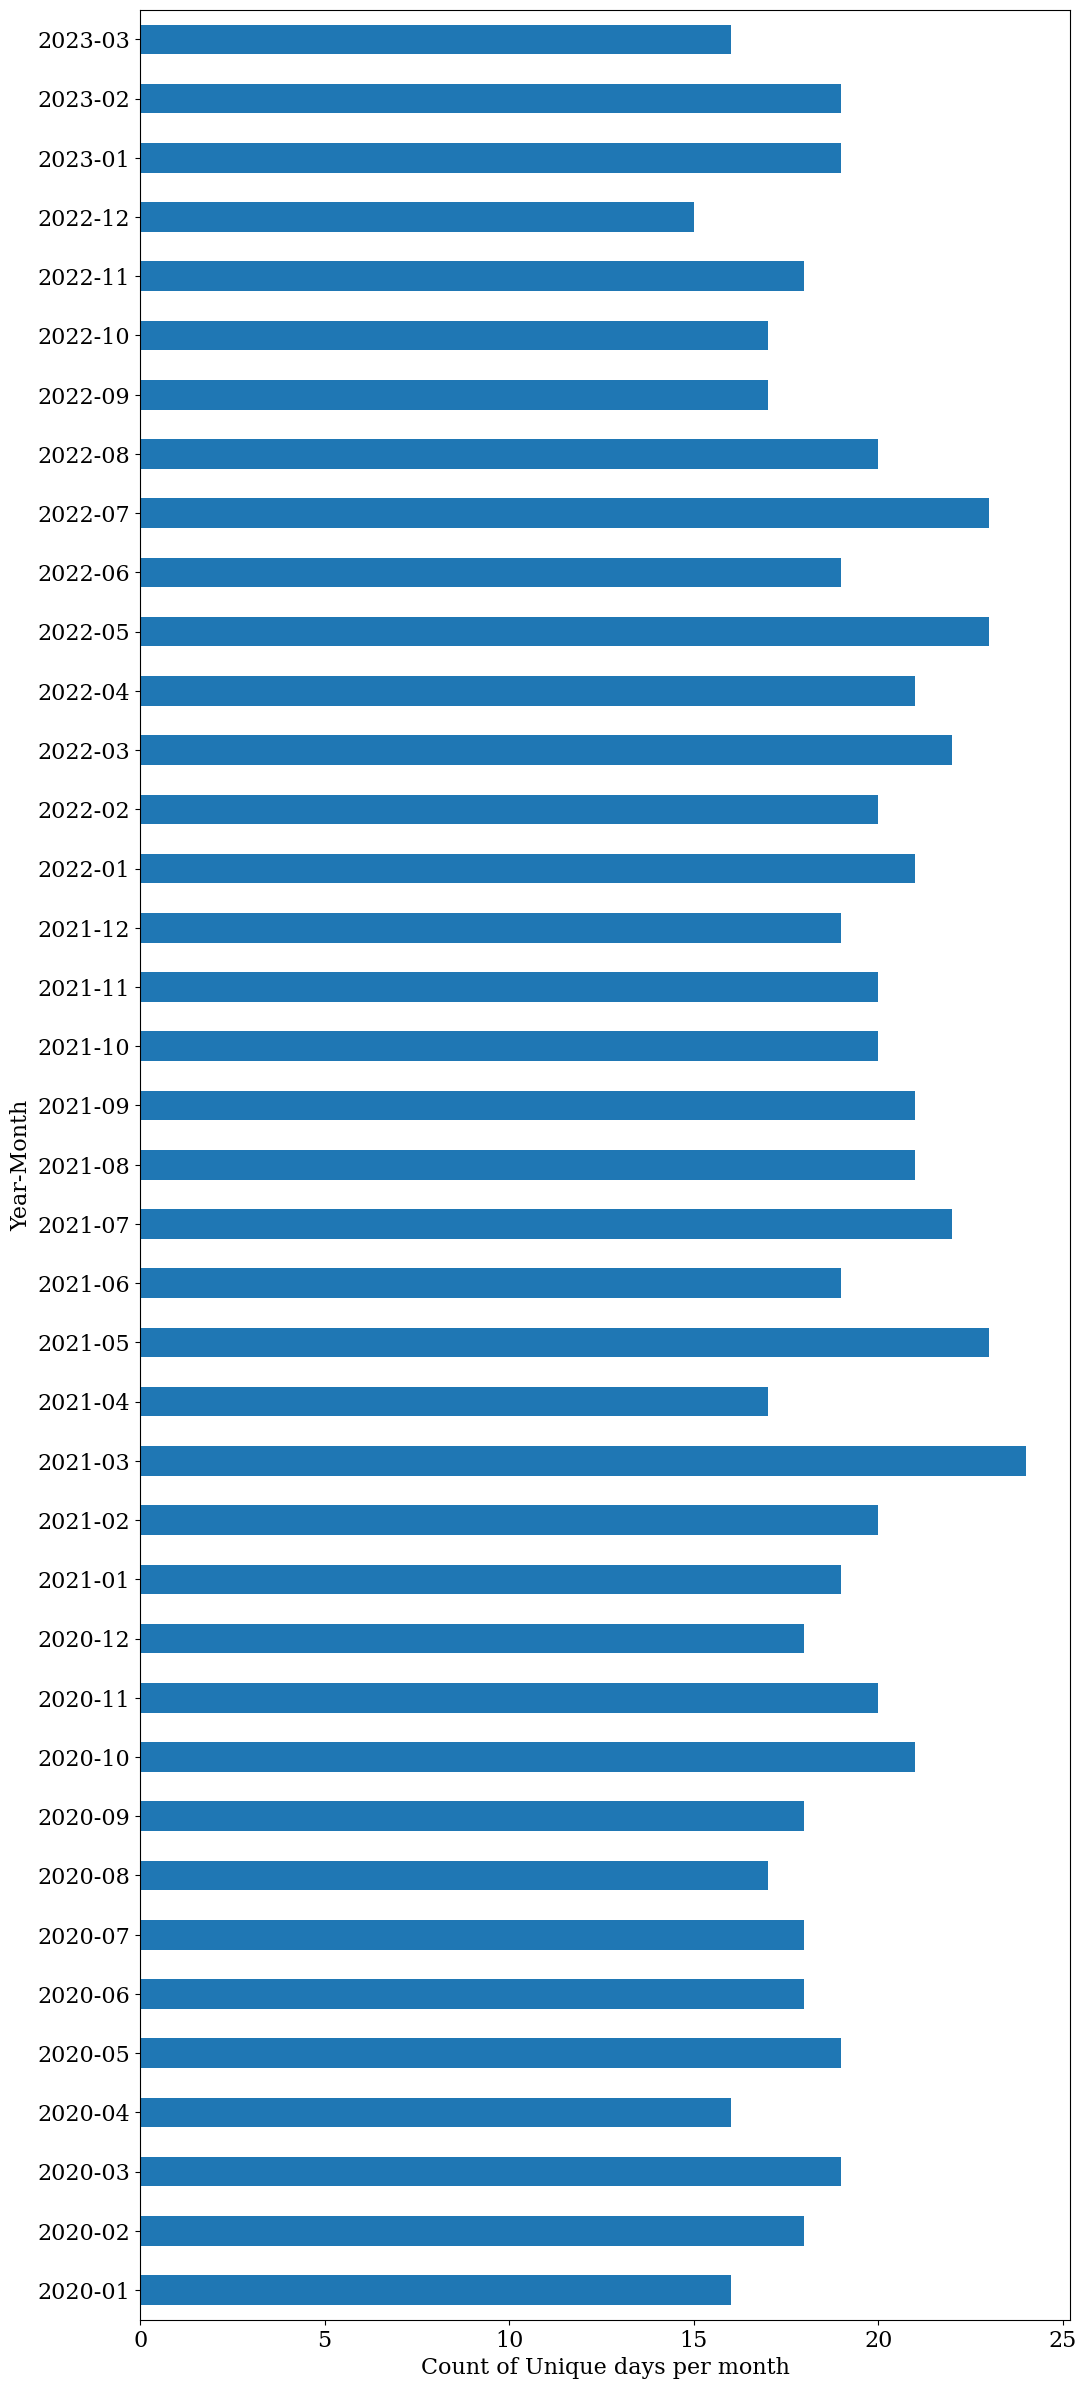

<IPython.core.display.Javascript object>

In [66]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(12, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [67]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        29
      2        35
      3        31
      4        28
      5        33
      6        33
      7        34
      8        34
      9        34
      10       36
      11       34
      12       32
2021  1        34
      2        33
      3        40
      4        30
      5        38
      6        34
      7        40
      8        33
      9        37
      10       33
      11       32
      12       33
2022  1        36
      2        32
      3        34
      4        33
      5        32
      6        29
      7        40
      8        29
      9        18
      10       17
      11       18
      12       15
2023  1        19
      2        19
      3        16
Name: size, dtype: int64


<IPython.core.display.Javascript object>

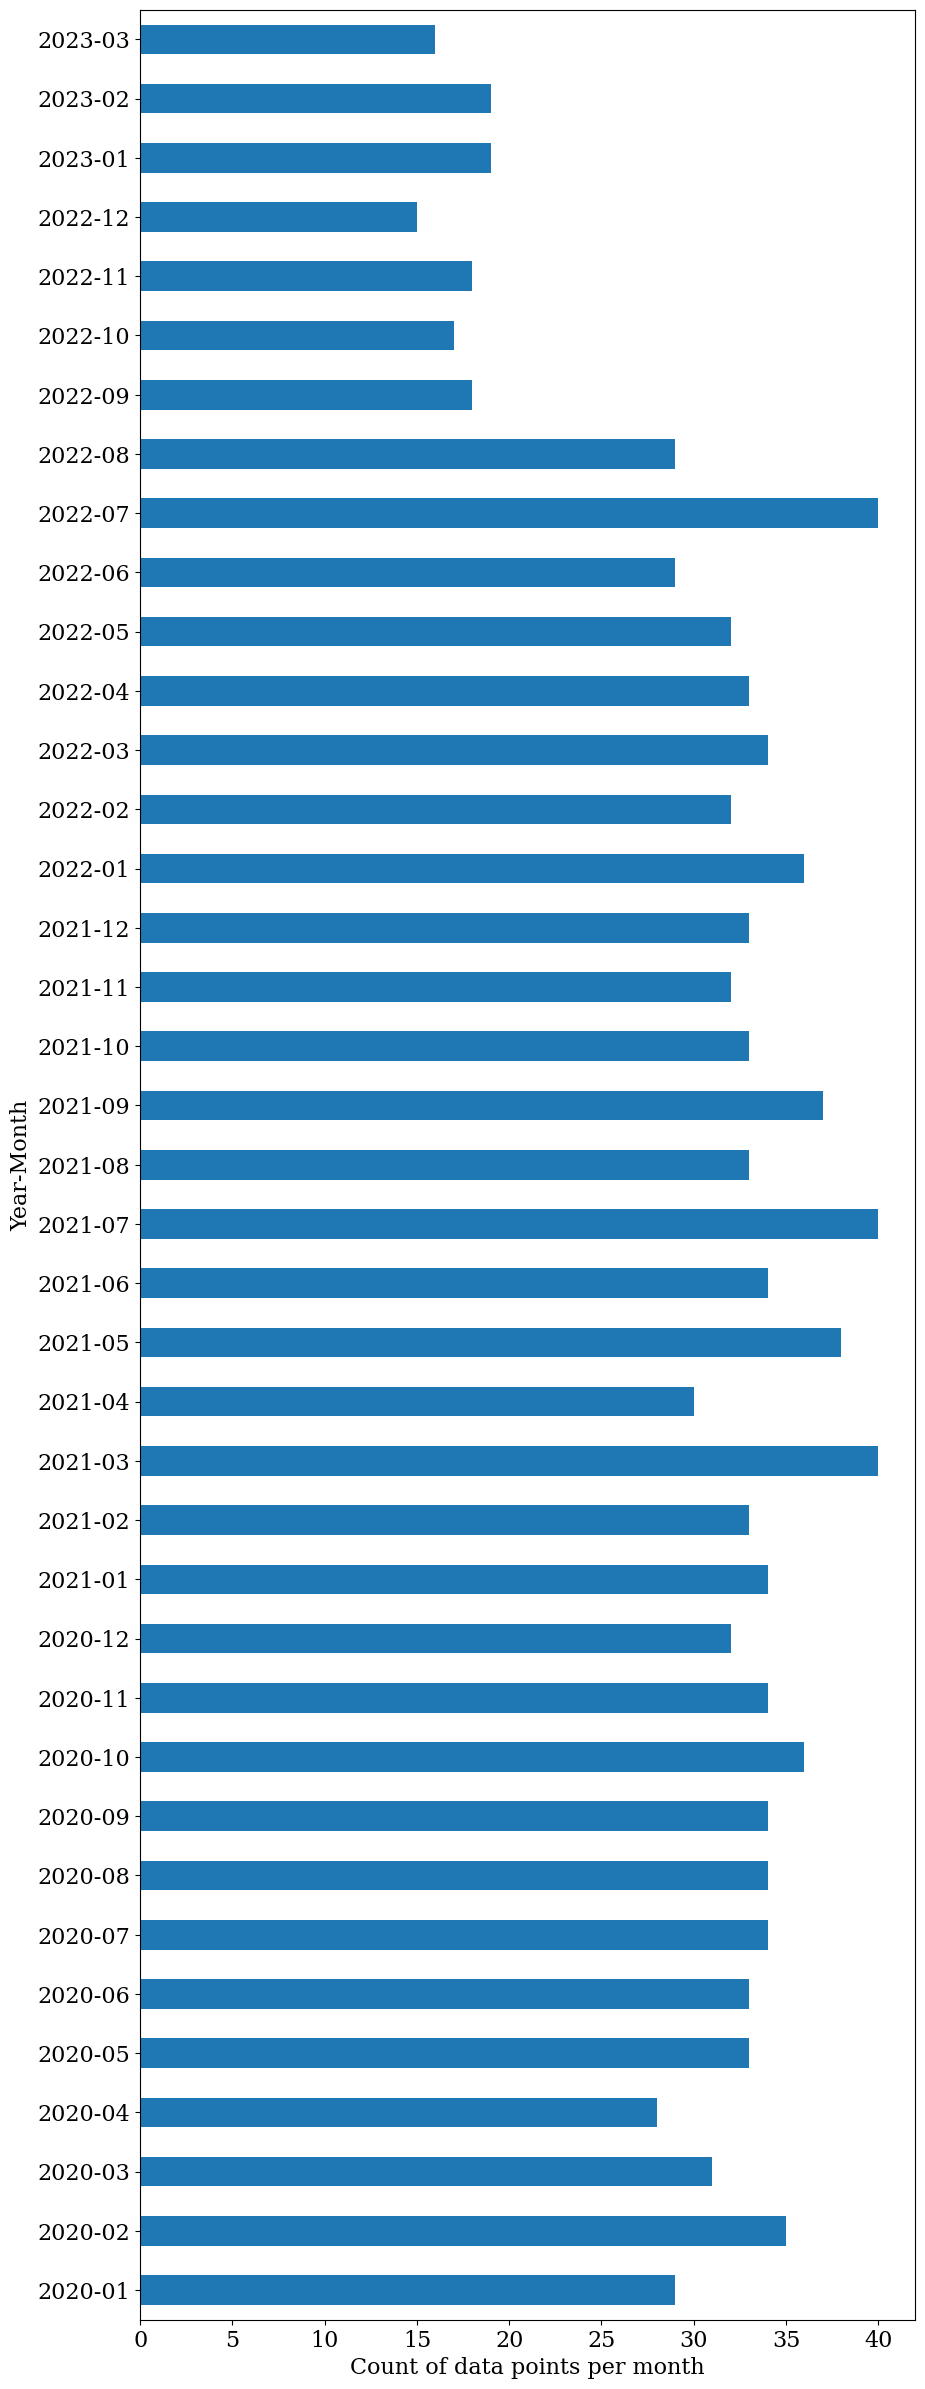

<IPython.core.display.Javascript object>

In [68]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [69]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2022-12 has the minimum number of days with samples - 15
2021-3 has the maximum number of days with samples - 40


<IPython.core.display.Javascript object>

In [70]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2020: 32, 2021: 34, 2022: 27, 2023: 18}

Mean number of observations - all years
30


<IPython.core.display.Javascript object>

In [71]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  753.000000
mean     1.589641
std      0.494920
min      1.000000
25%      1.000000
50%      2.000000
75%      2.000000
max      3.000000

<IPython.core.display.Javascript object>

In [72]:
day_counts[["DayCount"]].value_counts()

DayCount
2           442
1           310
3             1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [73]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
556  2022      5   14         3

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Day

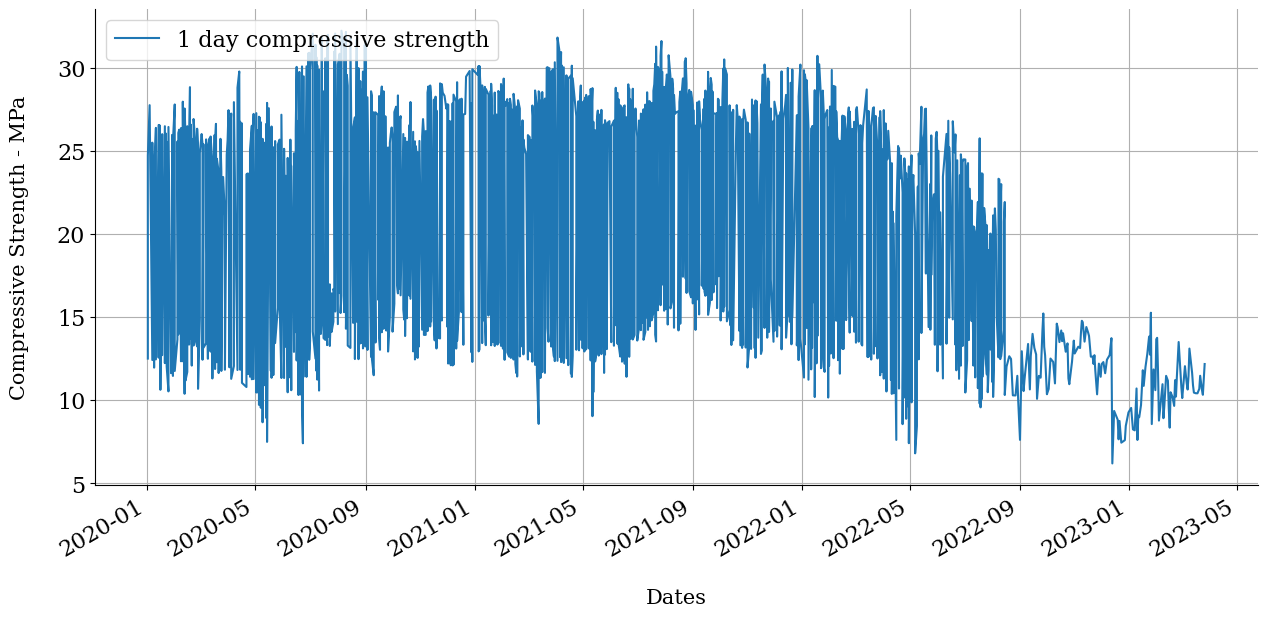

<IPython.core.display.Javascript object>

In [74]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

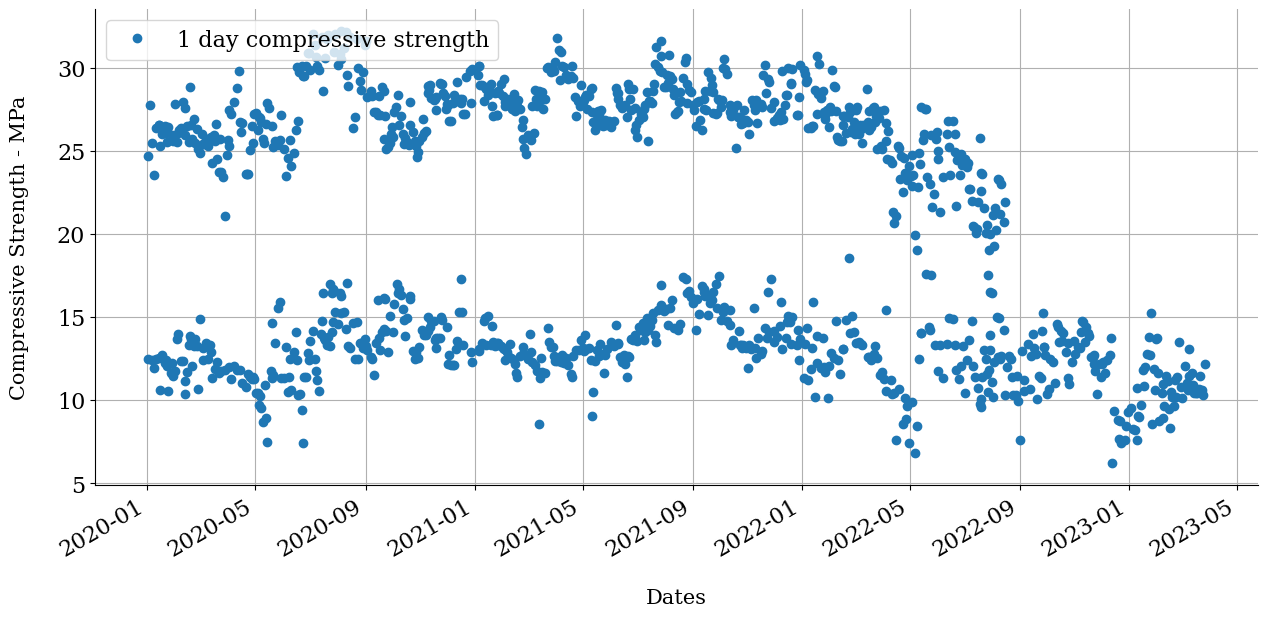

<IPython.core.display.Javascript object>

In [75]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax, marker="o", linestyle="")
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

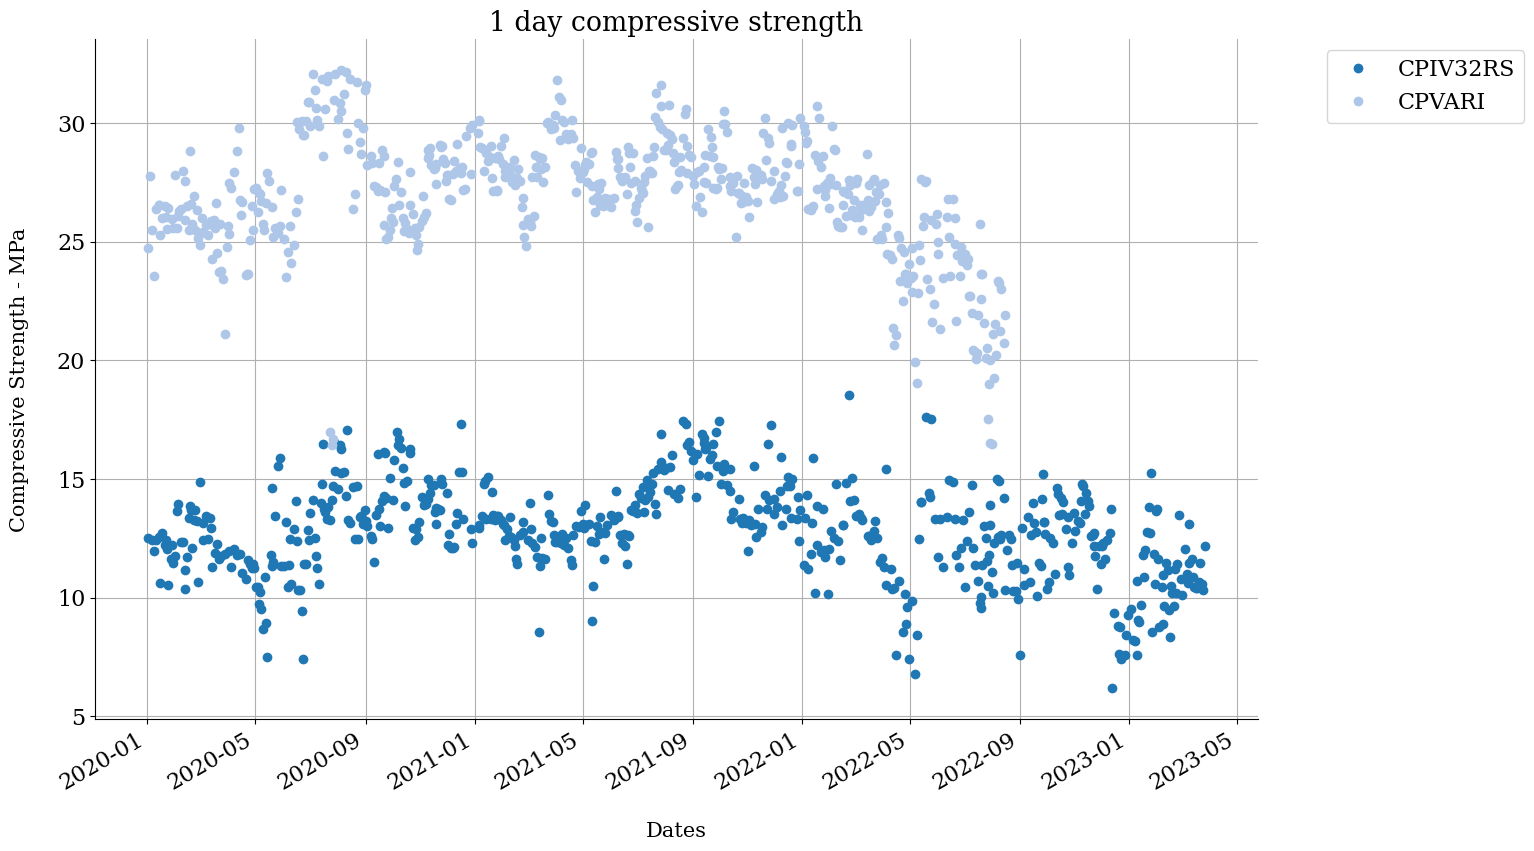

<IPython.core.display.Javascript object>

In [76]:
tmp = df[["Date", "CS1", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("1 day compressive strength")

plt.show()

#### 3 Days

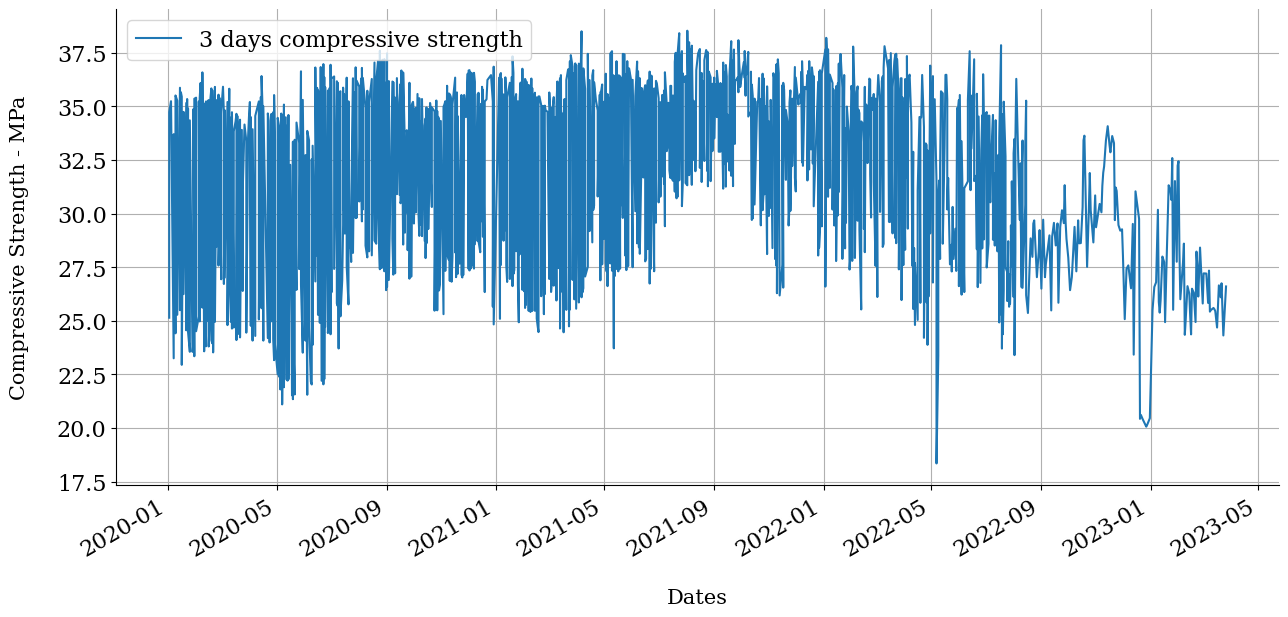

<IPython.core.display.Javascript object>

In [77]:
tmp = df[["Date", "CS3"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

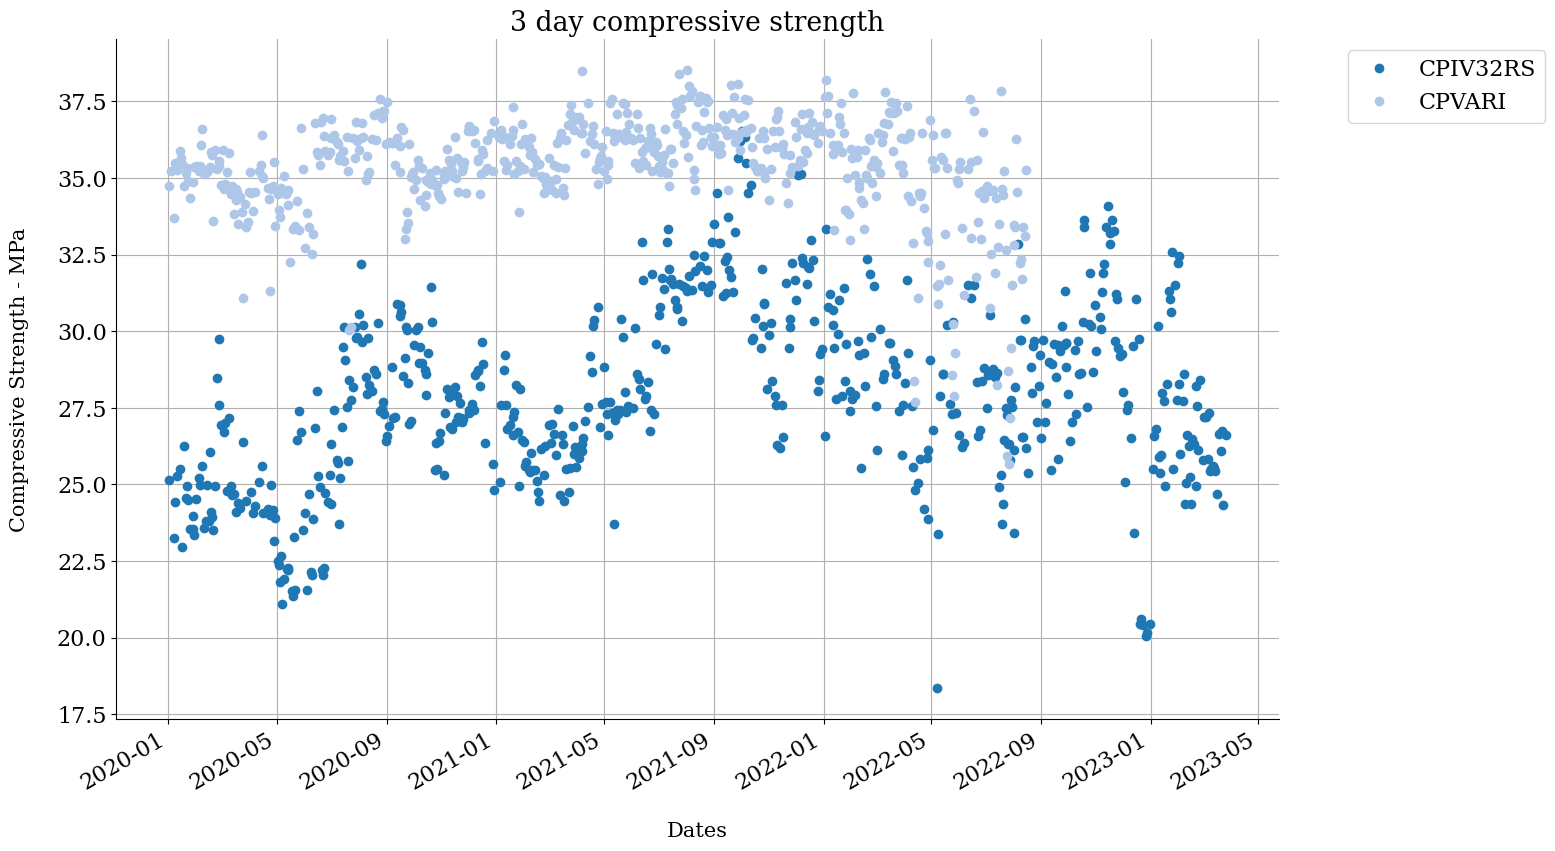

<IPython.core.display.Javascript object>

In [78]:
tmp = df[["Date", "CS3", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("3 day compressive strength")

plt.show()

#### 7 Days

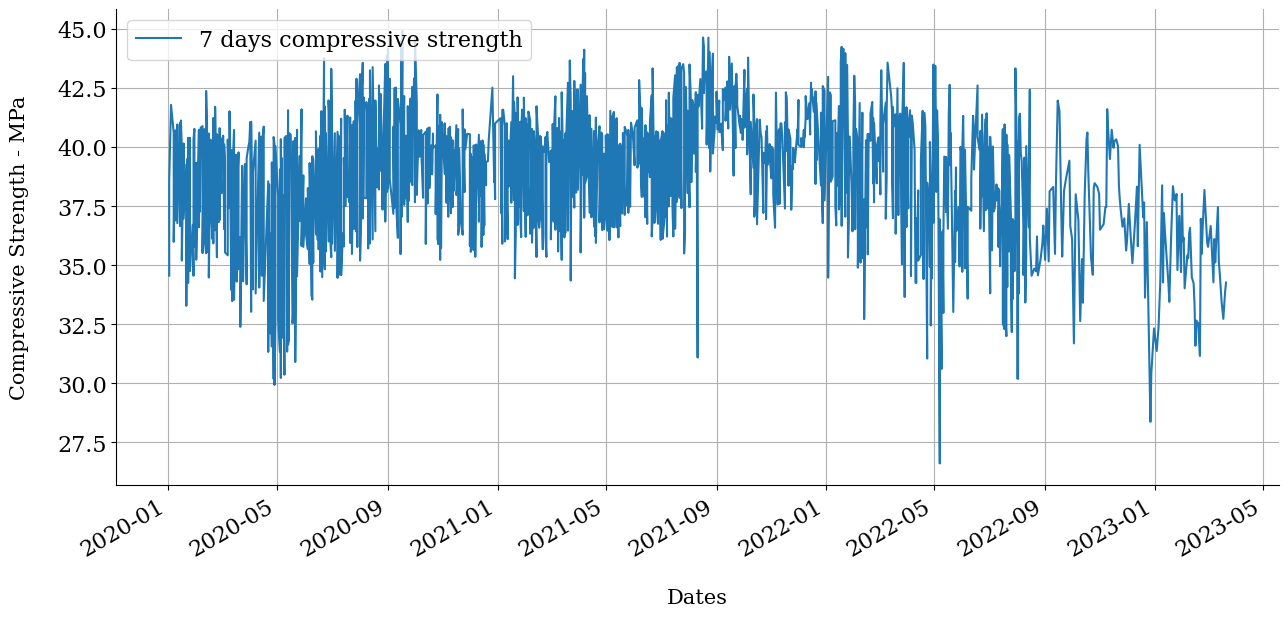

<IPython.core.display.Javascript object>

In [79]:
tmp = df[["Date", "CS7"]].dropna().copy()
tmp = tmp[tmp["CS7"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

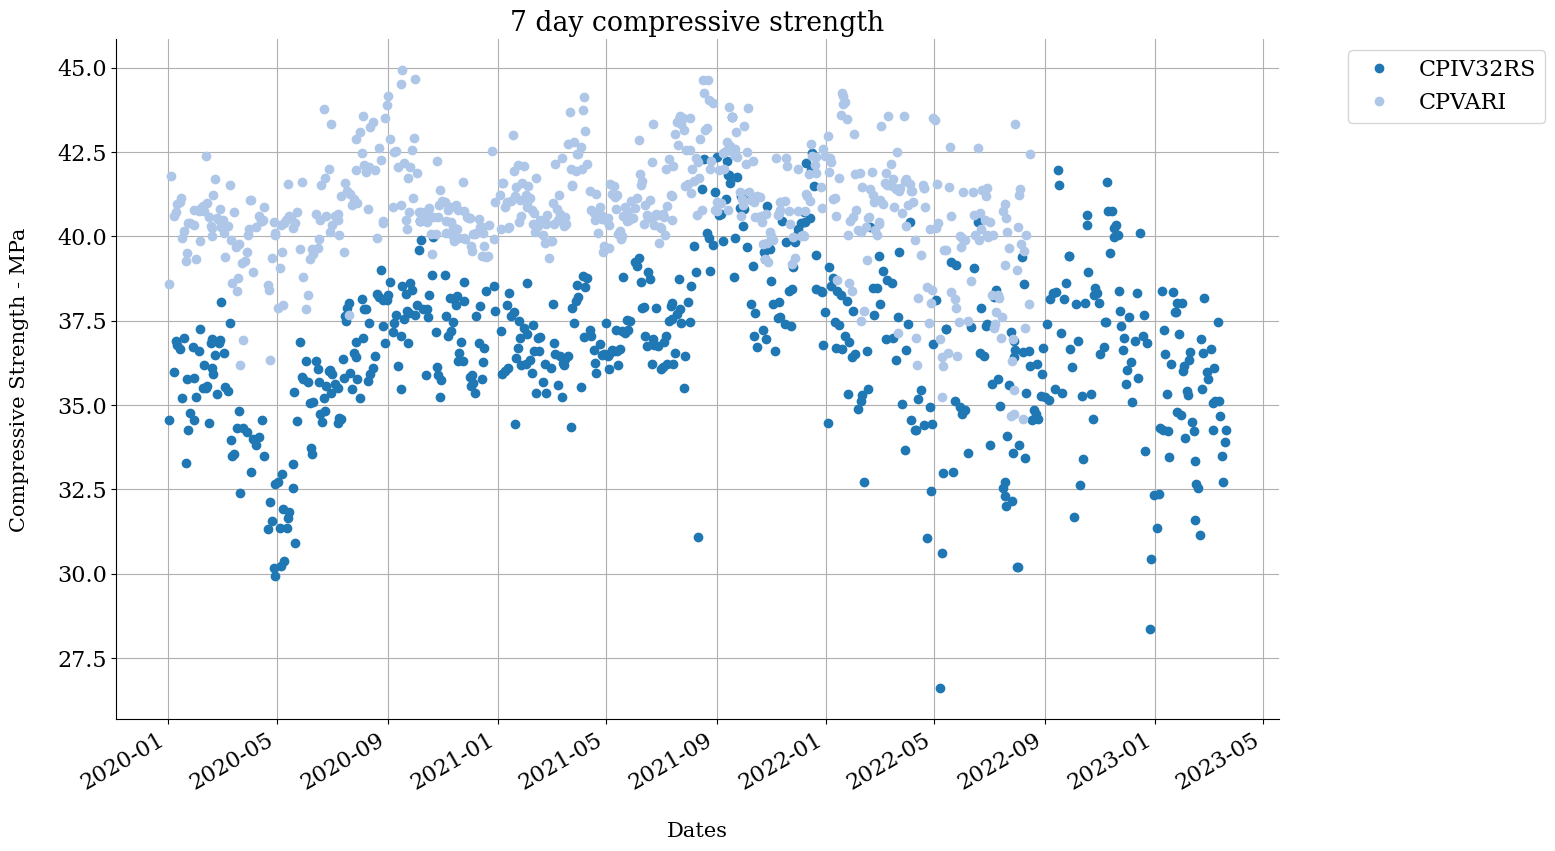

<IPython.core.display.Javascript object>

In [80]:
tmp = df[["Date", "CS7", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("7 day compressive strength")

plt.show()

#### 28 Days

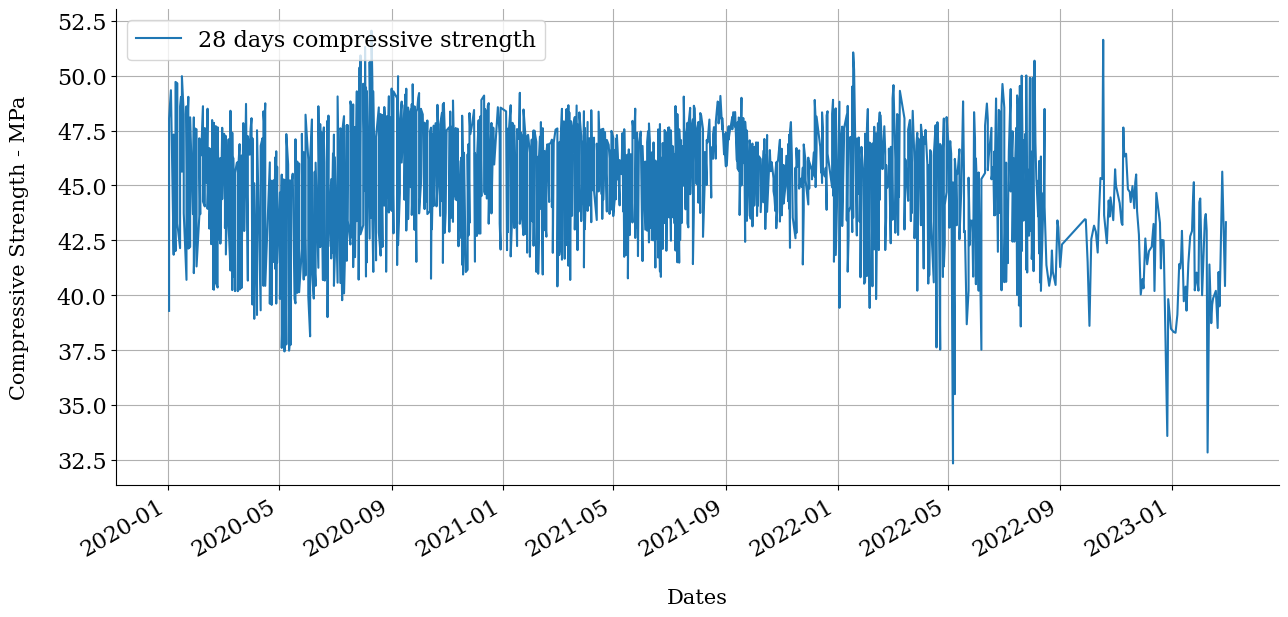

<IPython.core.display.Javascript object>

In [81]:
tmp = df[["Date", "CS28"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

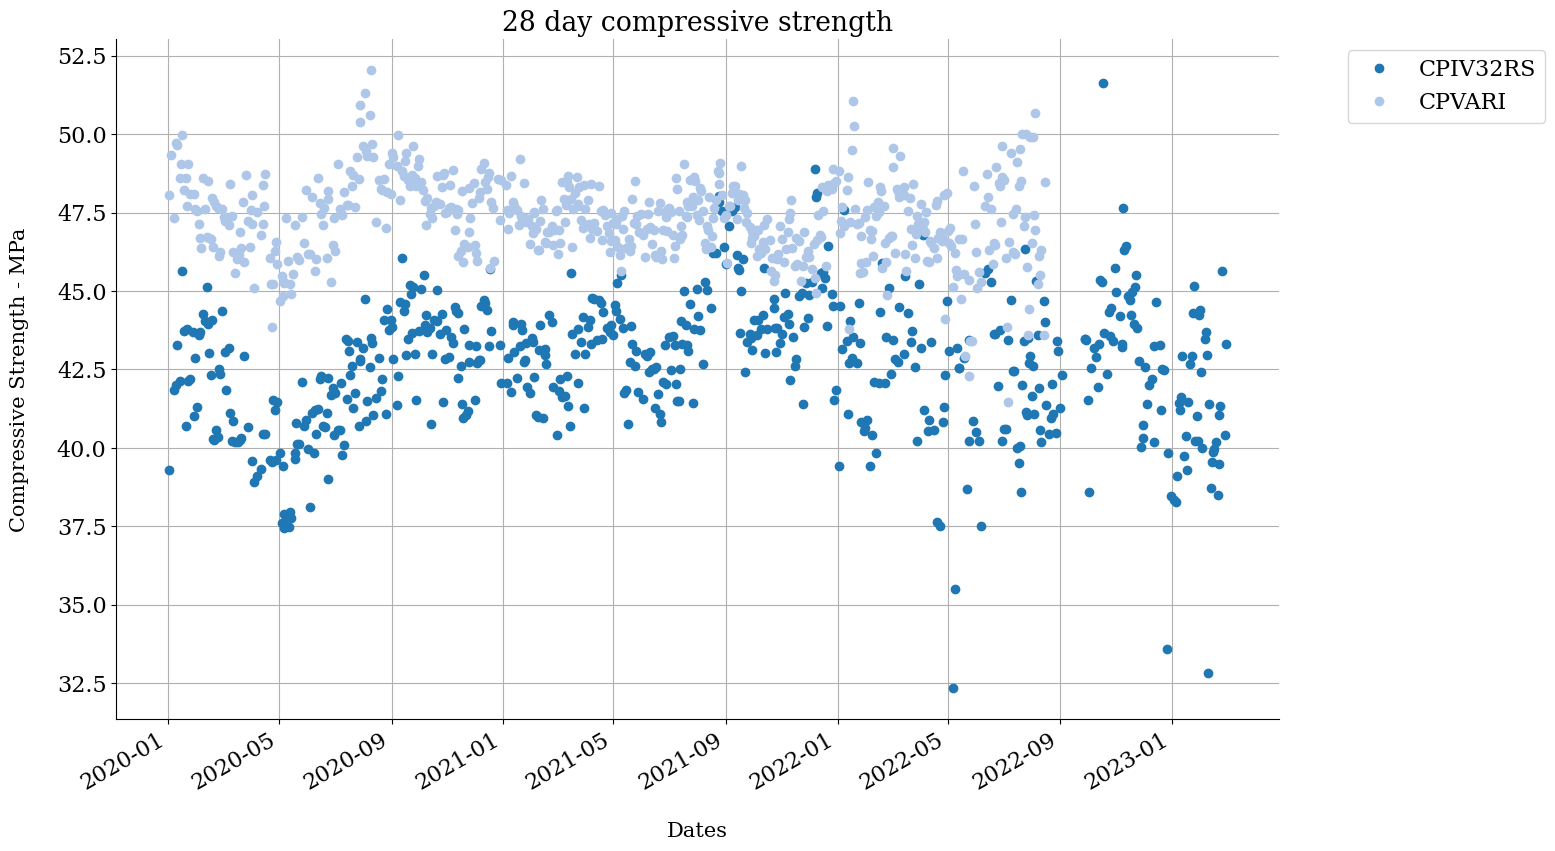

<IPython.core.display.Javascript object>

In [82]:
tmp = df[["Date", "CS28", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("28 day compressive strength")

plt.show()